In [1]:
%%latex
\tableofcontents

<IPython.core.display.Latex object>

# Project Topic
## Task
Project task is to develop and evaluate binary classification models. The learning includes data cleaning, management, analysis, visualization, feature engineering, model development and improvement. The models of interest are Logistic Regression, Random Forest and Gaussian Naive Bayes.

## Goals
Project goal is to deploy supervised machine learning models to the Adult dataset from UCI Machine Learning Repository and evaluate the performance of the predictive algorithms. Secondary goals are to clean the data, run exploratory data analysis with statistical analyses and visualization, and iterate and improve the model performance. As this is a binary classification problem, feature engineering with proper metric evaluation would be important. These activities are crucial for any machine learning task and the subsequent skills development.

# Data
## Data Source
The dataset was collected from UCI Machine Learning Repository at this link: https://archive.ics.uci.edu/ml/datasets/Census+Income.

Citation:
@misc{Kohavi:1994 ,
author = "Kohavi, Ronny and Becker, Barry",
year = "2017",
title = "{UCI} Machine Learning Repository",
url = "http://archive.ics.uci.edu/ml",
institution = "Silicon Graphics, Irvine, Data Mining and Visualization" }

## Data Description
Data Set Characteristics: Multivariate
Number of Instances: 48842
Area: Social
Attribute Characteristics: Categorical, Integer
Number of Attributes: 14
Date Donated: 1996-05-01
Associated Tasks: Classification
Missing Values? Yes

## Data Attributes
Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Data Summary

In [1]:
# Loading packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats
import pandoc

### Missing Values and Loading the Dataset
Data contains ( ?) - a whitespace & a question mark in case of missing values. This is why na_values=' ?' argument is passed while reading the data. Also, the dataset is divided into train & test part; this was done for easier prediction. However, as we aim to develop our own models, we will split the data into training & testing later. Here, we have merged the two datasets to form a single dataframe. Furthermore, the data does not have the column names; hence, the names=colnames argument is passed.

In [2]:
# Defining colnames and loading the dataframe
colnames=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
         'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'annual-income'] 
df_train = pd.read_csv("adult.data", names=colnames, header=None, na_values=' ?')
df_test = pd.read_csv("adult.test", names=colnames, header=None, na_values=' ?')
df_test = df_test.tail(-1)
df = pd.concat([df_train, df_test], ignore_index = True)

### Removing 'fnlwgt'
The 'fnlwgt' column reflects the weights on the files for each demographic. This weight can be used to extend the dataset to the fullest. However, for our machine learning algorithm the full dataset is not useful and this column is not relevant. Hence, this is being removed.

In [3]:
df = df.drop('fnlwgt', axis=1)

### Data Summary Statistics

In [4]:
df.shape

(48842, 14)

In [5]:
df.dtypes

age                object
workclass          object
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
annual-income      object
dtype: object

#### Data Type Change
Age variable seems to be an object which should be an integer. Furthermore, there are some leading whitespaces in some columns. We need to remove them.

In [6]:
# Change age data type
df['age'] = df['age'].astype(str).astype(int)

In [7]:
# Remove whitespaces
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [8]:
# Data summary for numerical features
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Data summary for categorical features
df.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,annual-income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [10]:
df.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [11]:
df.tail(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
48837,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
48838,64,NaN,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
48839,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
48840,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
48841,35,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


# Data Cleaning
## Data Type Change
We have already chaged the datatype of Age variable to integer.

## Whitespace Removal
Whitespaces are all removed from all the columns.

## Missing Values
As already mentioned, data contains ( ?) - a whitespace & a question mark in case of missing values. This is why na_values=' ?' argument is passed while reading the data. Now, we will look at the number of missing values by each column.

In [12]:
# Count of missing values
df.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
annual-income        0
dtype: int64

In [13]:
# Percentage of missing values
df.isna().sum()/df.count()

age               0.000000
workclass         0.060791
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.061021
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017860
annual-income     0.000000
dtype: float64

As it turn out, only 3 columns have missing values with lower frequency (1.8% ~ 6.1% compared to all respective cases). The removal of missing values will not impact the number of observations. Furthermore, missing values arise in categorical features whose imputation will not be straightforward to handle.

In [14]:
# Remove NAs
df = df.dropna()
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
48837,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
48839,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
48840,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


## Check of Imbalanced Dataset

In [15]:
# Check by target variable
df.groupby(['annual-income']).size()

annual-income
<=50K     22654
<=50K.    11360
>50K       7508
>50K.      3700
dtype: int64

### Cleaning target variable
It appears that the target variable has 4 outcomes. However, "<=50K." and "<=50K" can be counted as same. We will be replacing the strings here.

In [16]:
# Clean the target variable
df['annual-income'] = df['annual-income'].str.replace('<=50K.','<=50K')
df['annual-income'] = df['annual-income'].str.replace('>50K.','>50K')

In [17]:
df.groupby(['annual-income']).size()

annual-income
<=50K    34014
>50K     11208
dtype: int64

In [18]:
df.groupby(['annual-income']).size().transform(lambda x: x/sum(x))

annual-income
<=50K    0.752156
>50K     0.247844
dtype: float64

<Axes: title={'center': 'Count of observations by annual income'}, xlabel='annual-income'>

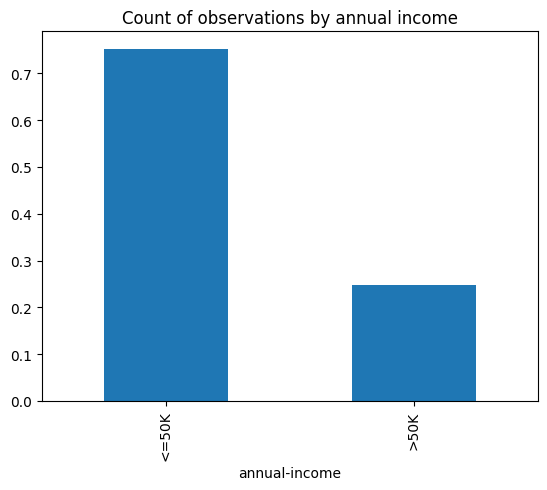

In [19]:
df_out = df.groupby(['annual-income']).size().transform(lambda x: x/sum(x))
df_out.plot.bar(title='Count of observations by annual income')

It is quite clear that the data is imbalanced in nature. We have 75% observations for <=50K annual income whereas this is only 25% for >50K.

## Conclusion of Data Cleaning
The dataset had data type, whitespace, missing value notation and unexpected string errors. Missing values were not frequent; hence all the observations with missing values were removed (8% of total observations were removed) by getting a total of 44,993 observations out of 48,842. It was also investigated that the data is imbalanced in nature with a ratio of 3:1 for annual income over 50K to annual income of equal or less than 50K.

# Exploratory Data Analysis
We will run univariate, bivariate and multivariate analysis of all the features here. Then, scatterplot for continuous variables, box plot for continuous-categorical variables and crosstab for categorical variables will be developed. These shall guide our understanding of the distribution as well as point us to the proper statistical tests. We will conduct independent t-tests and Chi-squared tests to find the relationship between target variables and the variable(s) in question.

Our objective is to:
1) Understand the variables & their distributions
2) Plot various graphs for easier visualization & understanding
3) Run statistical tests (t-tests and Chi-squared) to understand the impact on target variables
4) Build correlation matrix to understand the mutual impact of x variables
5) Retain only the relevant and the most significant features for model development (to reduce multicollinearity and overfitting)

## Univariate Analysis

### Histogram of age
It appears to resemble normal distribution with a mean of 38.64 and the range of 17 to 90.

<Axes: >

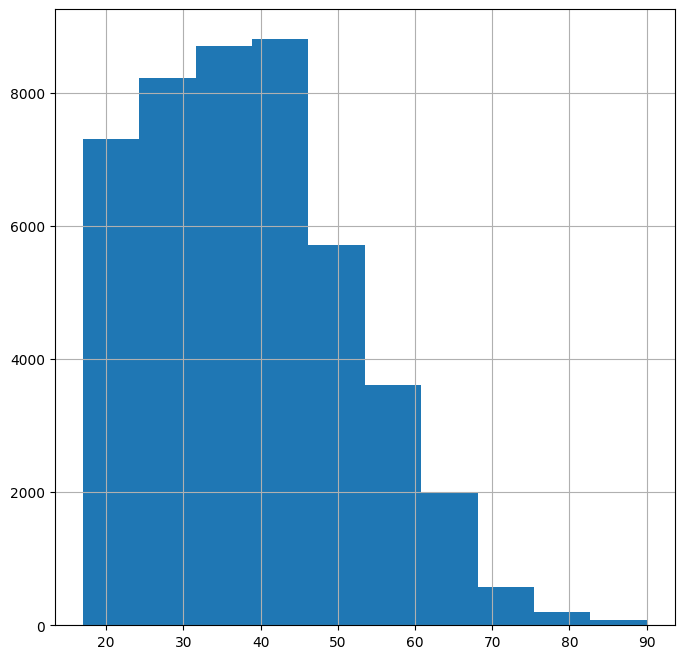

In [20]:
df['age'].hist(figsize=(8,8))

### Histogram of hours worked per week
It also appears to resemble normal distribution with a mean of 40.42 and the range of 1 to 99.

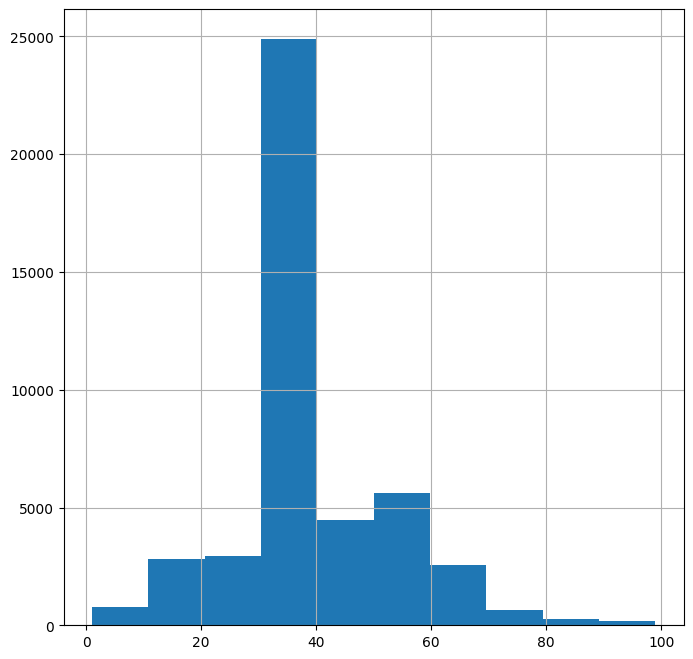

In [21]:
df['hours-per-week'].hist(figsize=(8,8))
plt.show()

### Histogram of capital gain
Capital gain does not resemble any particular distribution.

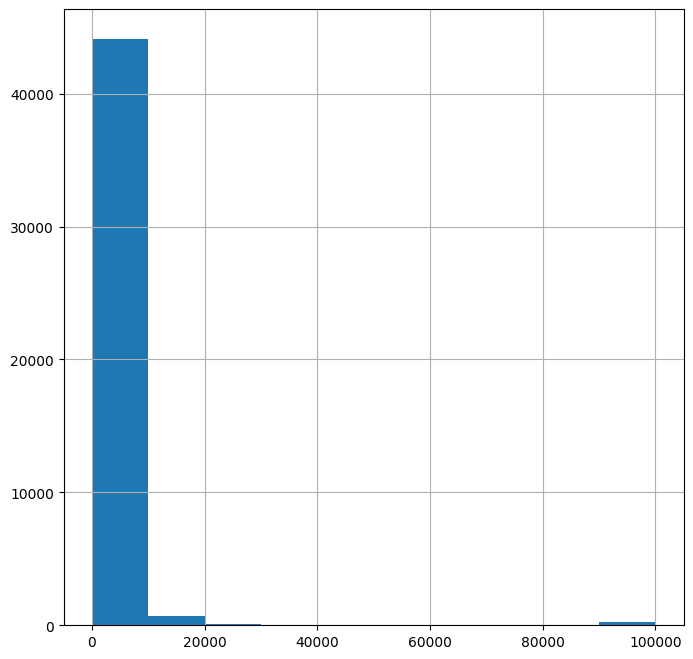

In [22]:
df["capital-gain"].hist(figsize=(8,8))
plt.show()

### Histogram of capital loss
Capital loss does not resemble any particular distribution as well.

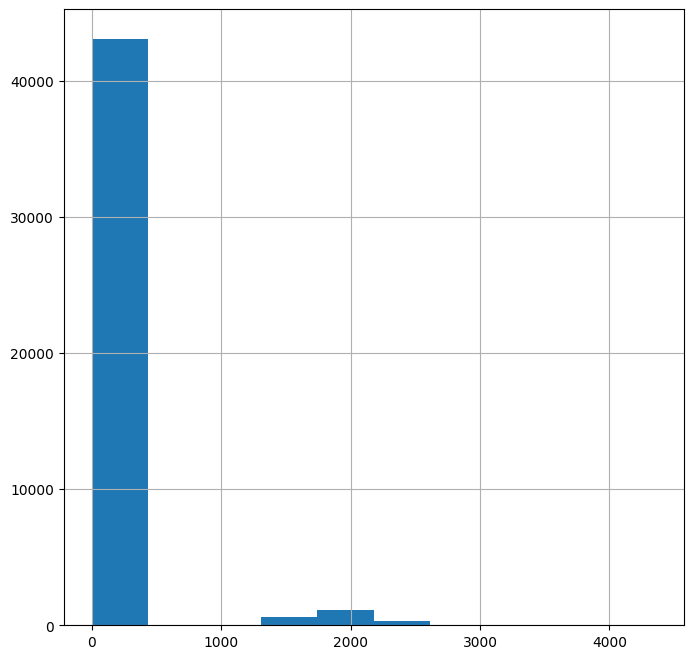

In [23]:
df["capital-loss"].hist(figsize=(8,8))
plt.show()

### Histogram of education
It appears that the majority of the education is in the HS-grad bucket with the 2nd being some-college. We also find Bachelors as it stands in the 3rd ranking.

<Axes: title={'center': 'Histogram of education'}, xlabel='education'>

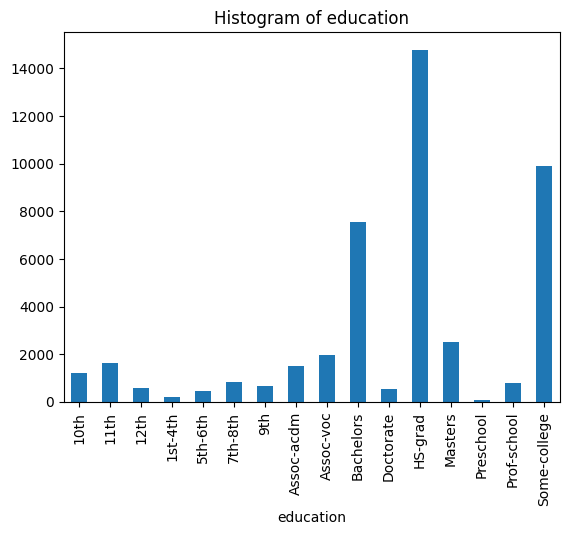

In [24]:
df_out = df.groupby(['education']).size()
df_out.plot.bar(title='Histogram of education')

### Histogram of workclass
Majority are in Private sector while the rest show somewhat similar frequencies.

<Axes: title={'center': 'Histogram of workclass'}, xlabel='workclass'>

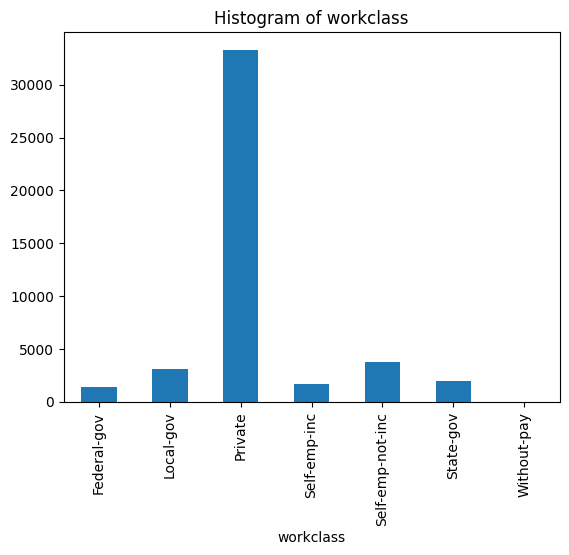

In [25]:
df_out = df.groupby(['workclass']).size()
df_out.plot.bar(title='Histogram of workclass')

### Histogram of education number
Majority are in 9, 10 and 13 step in descending order.

<Axes: title={'center': 'Histogram of education num'}, xlabel='education-num'>

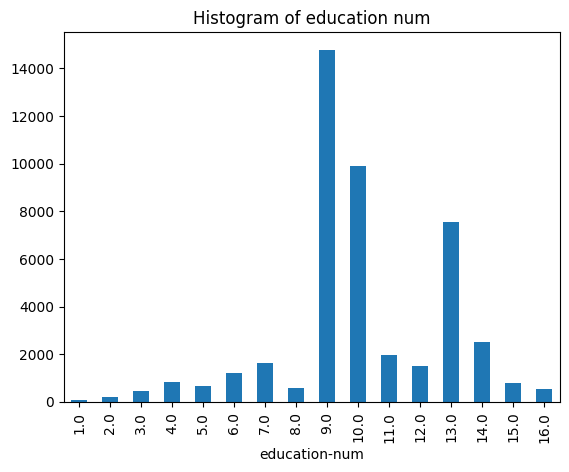

In [26]:
df_out = df.groupby(['education-num']).size()
df_out.plot.bar(title='Histogram of education num')

### Histogram of marital status
Most are married with spouse and never-married comes into 2nd place. Divorced is the 3rd one.

<Axes: title={'center': 'Histogram of marital status'}, xlabel='marital-status'>

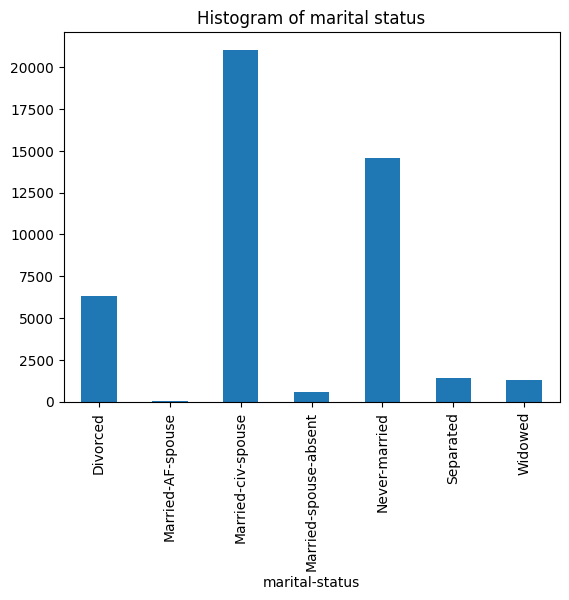

In [27]:
df_out = df.groupby(['marital-status']).size()
df_out.plot.bar(title='Histogram of marital status')

### Histogram of occupation
This does not exhibit any particular pattern. We see high frquencies in 6 of the occupations.

<Axes: title={'center': 'Histogram of occupation'}, xlabel='occupation'>

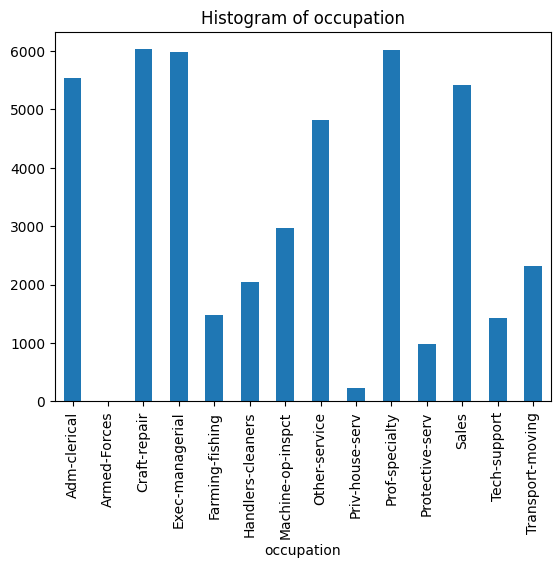

In [28]:
df_out = df.groupby(['occupation']).size()
df_out.plot.bar(title='Histogram of occupation')

### Histogram of relationship
Most frequent relationship reported is husband; not-in-family comes in 2nd.

<Axes: title={'center': 'Histogram of relationship'}, xlabel='relationship'>

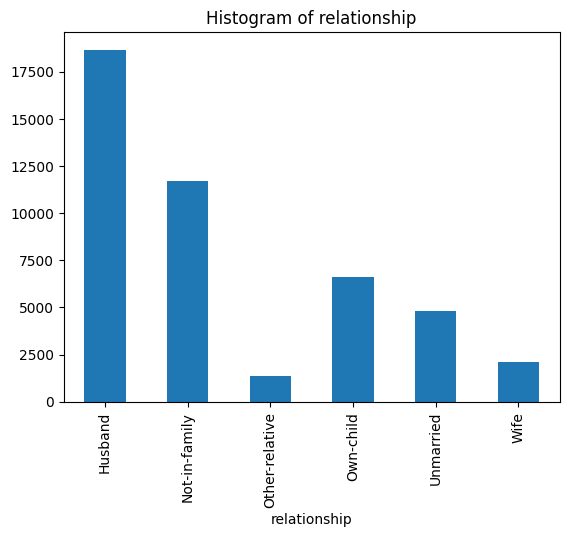

In [29]:
df_out = df.groupby(['relationship']).size()
df_out.plot.bar(title='Histogram of relationship')

### Histogram of race
White dominates by far in terms of observational frequency in the data for race category.

<Axes: title={'center': 'Count of observations by race'}, xlabel='race'>

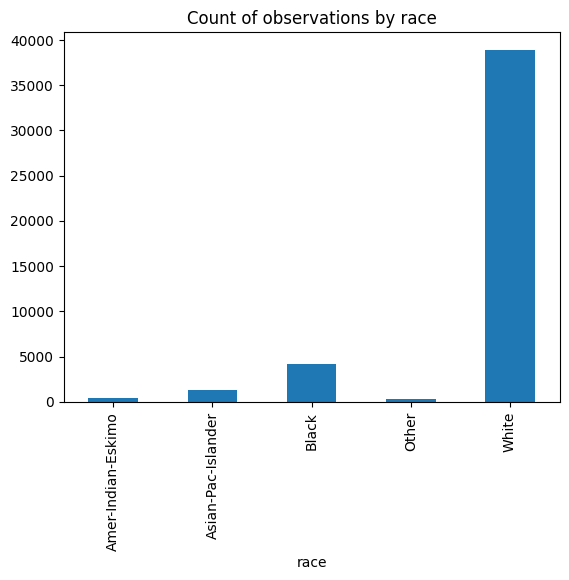

In [30]:
df_out = df.groupby(['race']).size()
df_out.plot.bar(title='Count of observations by race')

### Histogram of sex
Male is overrepresented in the dataset with 2:1 ratio for male:female.

<Axes: title={'center': 'Count of observations by sex'}, xlabel='sex'>

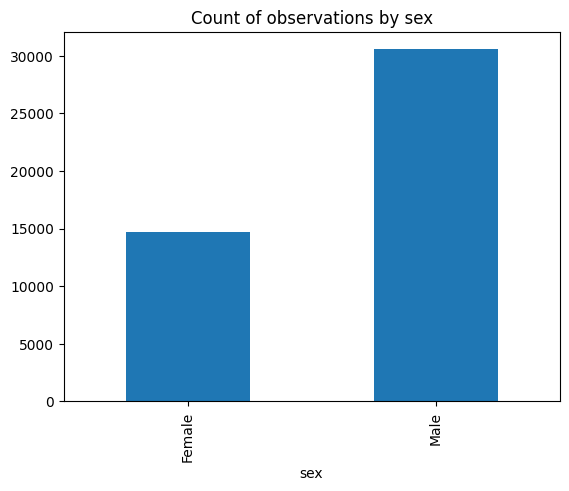

In [31]:
df_out = df.groupby(['sex']).size()
df_out.plot.bar(title='Count of observations by sex')

### Histogram of native country
United States dominates the frequency for native country count.

<Axes: title={'center': 'Count of observations by native-country'}, xlabel='native-country'>

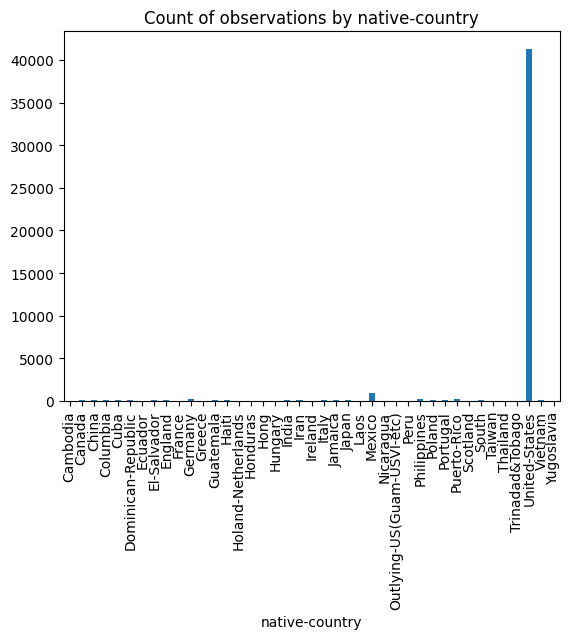

In [32]:
df_out = df.groupby(['native-country']).size()
df_out.plot.bar(title='Count of observations by native-country')

## Bivariate Analysis

### Relationship between age and annual income

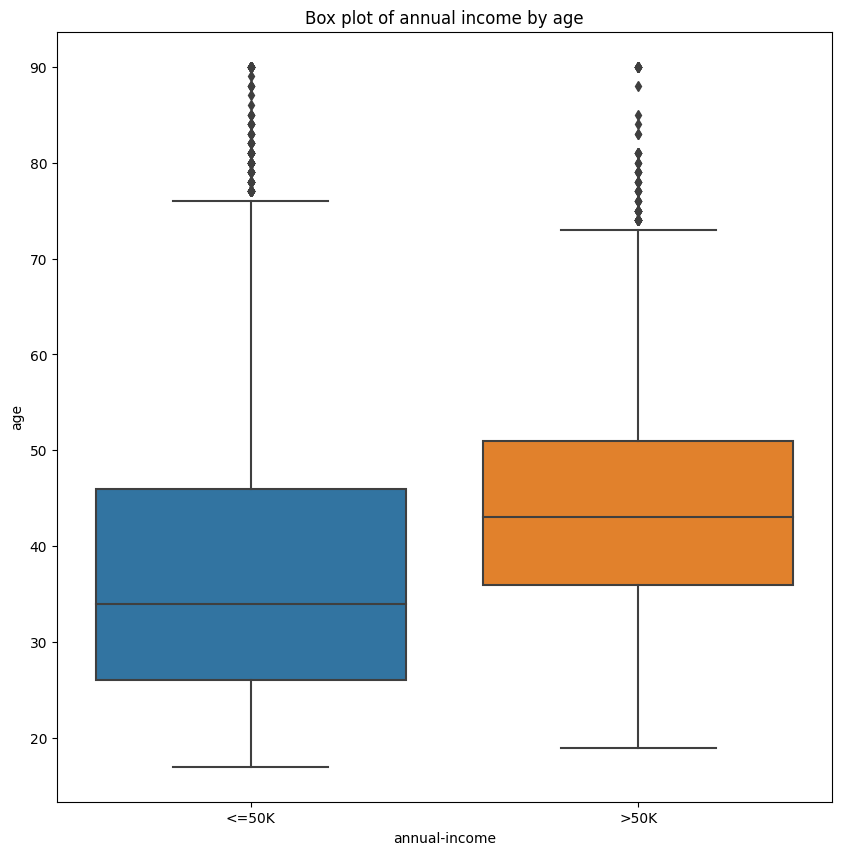

In [33]:
# boxplot
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="annual-income", y="age", data=df).set_title("Box plot of annual income by age")
plt.show()

In [34]:
# Mean
df[['annual-income', 'age']].groupby(['annual-income'], as_index=False).mean().sort_values(by='age', ascending=False)

,annual-income,age
1,>50K,44.006067
0,<=50K,36.749427


In [35]:
# t-test
import random

data = df[(np.abs(stats.zscore(df["age"])) < 3)] 

income_1 = data[data['annual-income']==">50K"]['age']
income_0 = data[data['annual-income']=="<=50K"]['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 4.587107026879345
p value 8.491736874827582e-06
we reject null hypothesis


We reject the null hypothesis from the two-sample independent t-test i.e. there is significant difference in annual income by age. We can count age a discriminatory factor for our model.

### Relationship between capital gain and annual income

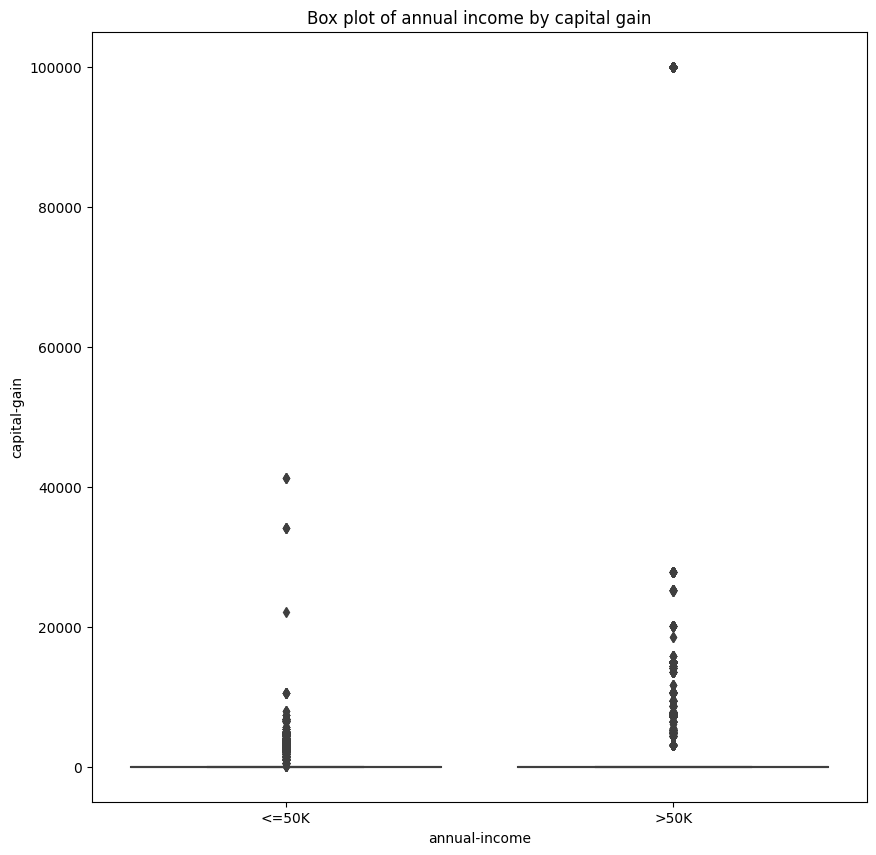

In [36]:
# boxplot
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="annual-income", y="capital-gain", data=df).set_title("Box plot of annual income by capital gain")
plt.show()

In [37]:
# t-test
import random

data = df[(np.abs(stats.zscore(df["capital-gain"])) < 3)] 

income_1 = data[data['annual-income']==">50K"]['capital-gain']
income_0 = data[data['annual-income']=="<=50K"]['capital-gain']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.817049484290308
p value 0.0002295071216938463
we reject null hypothesis


We reject the null hypothesis from the two-sample independent t-test i.e. there is significant difference in annual income by capital-gain. We can count capital-gain a discriminatory factor for our model.

### Relationship between capital loss and annual income

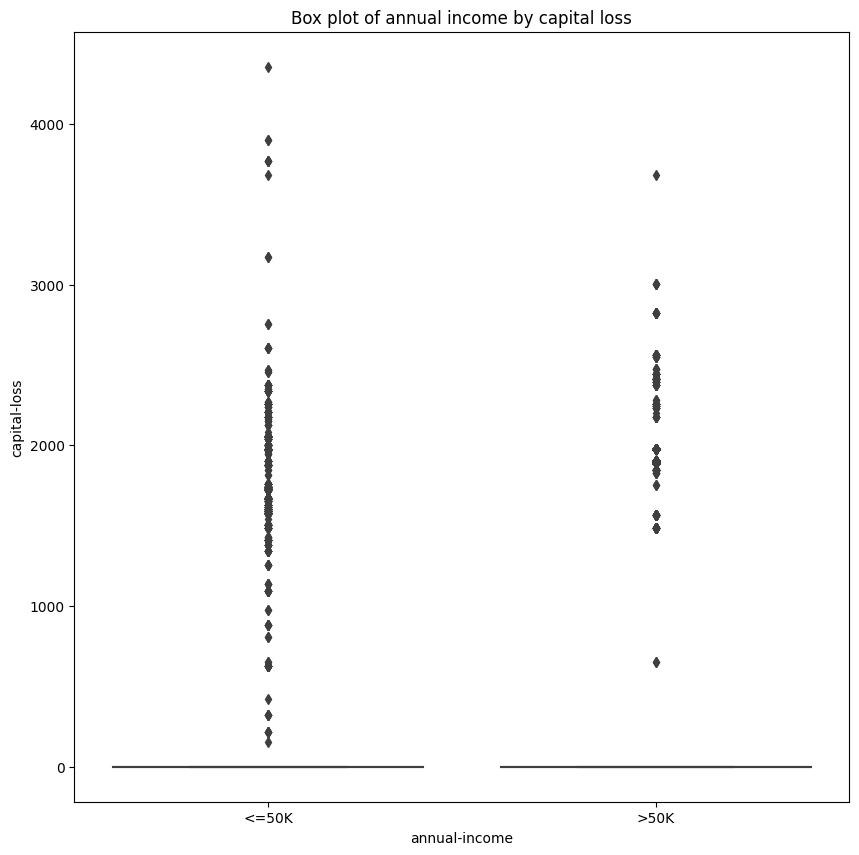

In [38]:
# boxplot
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="annual-income", y="capital-loss", data=df).set_title("Box plot of annual income by capital loss")
plt.show()

In [39]:
# t-test
import random

data = df[(np.abs(stats.zscore(df["capital-loss"])) < 3)] 

income_1 = data[data['annual-income']==">50K"]['capital-loss']
income_0 = data[data['annual-income']=="<=50K"]['capital-loss']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest nan
p value nan
we accept null hypothesis


We cannot reject the null hypothesis from the two-sample independent t-test i.e. there is no significant difference in annual income by capital-loss. Hence, We cannot count capital-loss a discriminatory factor for our model.

### Feature Engineering
As capital-gain and capital-loss indicate the difference in capital, we can build a new feature called 'delta-capita' to signify this change in capital. If we can retain this feature only, we can exclude both capital-gain and capital-loss from the dataset.

In [40]:
# delta capital
df['delta-capital'] = df['capital-gain']-df['capital-loss']
df['delta-capital'].describe()

count    45222.000000
mean      1012.834925
std       7530.315380
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: delta-capital, dtype: float64

In [41]:
# correlation
df['capital-gain'].corr(df['delta-capital'])

0.998554474506535

<Axes: xlabel='capital-gain'>

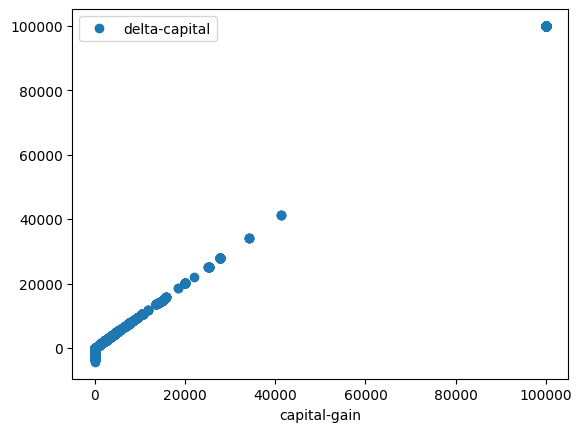

In [42]:
# scatterplot
df.plot(x='capital-gain', y='delta-capital', style='o')

As the correlation between delta-capital and capital-gain is high (0.99), we can retain one of them. Also, capital-loss is found to be insignificant on annual-income (our target variable). Hence, we can remove both capital-gain & capital-loss and can only keep delta-capital in our feature set.

In [43]:
# removal
df = df.drop(columns = ['capital-gain', 'capital-loss'], axis=1)
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,annual-income,delta-capital
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,<=50K,2174.0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,<=50K,0.0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,<=50K,0.0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,<=50K,0.0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,<=50K,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,40.0,United-States,<=50K,0.0
48837,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,36.0,United-States,<=50K,0.0
48839,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,50.0,United-States,<=50K,0.0
48840,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40.0,United-States,<=50K,5455.0


### Relationship between delta capital and annual income

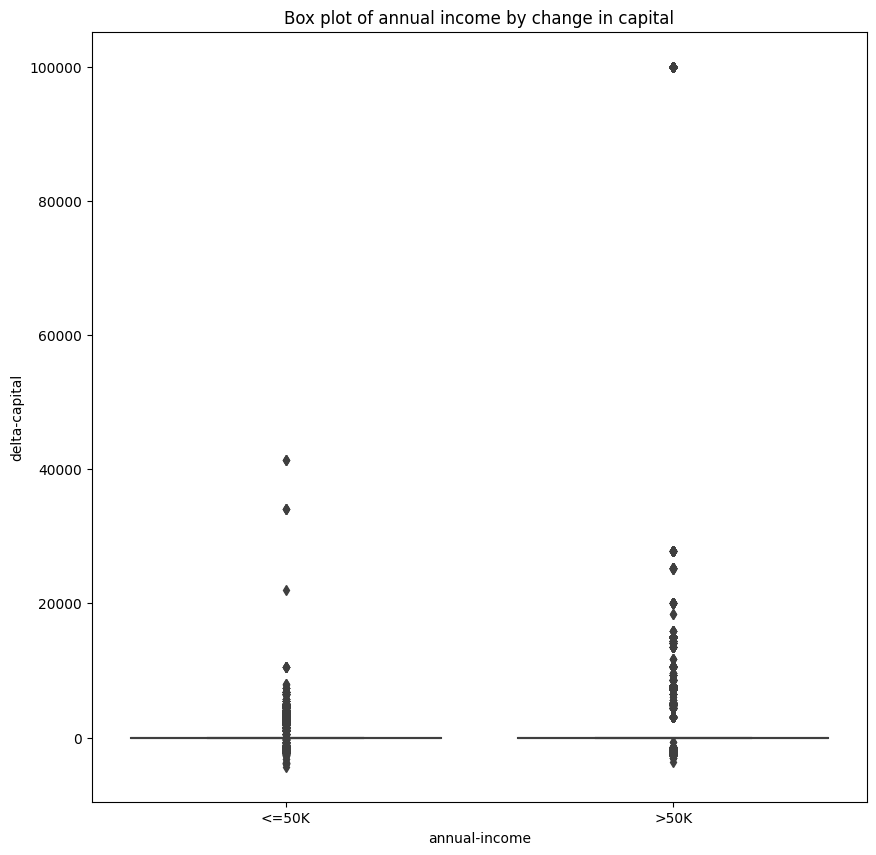

In [44]:
# boxplot
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="annual-income", y="delta-capital", data=df).set_title("Box plot of annual income by change in capital")
plt.show()

In [45]:
# outliers
df.loc[(df['delta-capital'] >= 80000)]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,annual-income,delta-capital
1246,54,Self-emp-inc,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,60.0,United-States,>50K,99999.0
1368,52,Private,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,40.0,Japan,>50K,99999.0
1482,53,Self-emp-inc,HS-grad,9.0,Married-civ-spouse,Sales,Husband,White,Male,40.0,United-States,>50K,99999.0
1528,52,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,50.0,United-States,>50K,99999.0
1616,46,Private,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,60.0,United-States,>50K,99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47739,32,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,60.0,United-States,>50K,99999.0
48582,61,Self-emp-not-inc,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,30.0,United-States,>50K,99999.0
48591,36,Private,Bachelors,13.0,Never-married,Prof-specialty,Not-in-family,White,Male,45.0,United-States,>50K,99999.0
48598,42,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,42.0,United-States,>50K,99999.0


#### Outliers
There are significant outliers in delta-capital with all of them being 99999.0. This is unusual observation.

In [46]:
# outlier count
(df['delta-capital'] >= 80000).sum()/df['delta-capital'].count()

0.00506390694794569

Only 0.5% of the observations are outliers with abberant observations. Let's see what happens if we remove them.

In [47]:
# t-test without outliers
data = df.loc[~(df['delta-capital'] >= 80000)]
import random

data = data[(np.abs(stats.zscore(df["delta-capital"])) < 3)] 

income_1 = data[data['annual-income']==">50K"]['delta-capital']
income_0 = data[data['annual-income']=="<=50K"]['delta-capital']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 4.054215579898928
p value 9.664881308832429e-05
we reject null hypothesis


The delta-capital still remains a discriminatory factor even after the removal of all outliers with 99999.0 value. We can seefly remove them as they are only 0.5% of the whole data.

In [48]:
# removal of outliers
df = df.loc[~(df['delta-capital'] >= 80000)]

### Relationship between hours per week and annual income

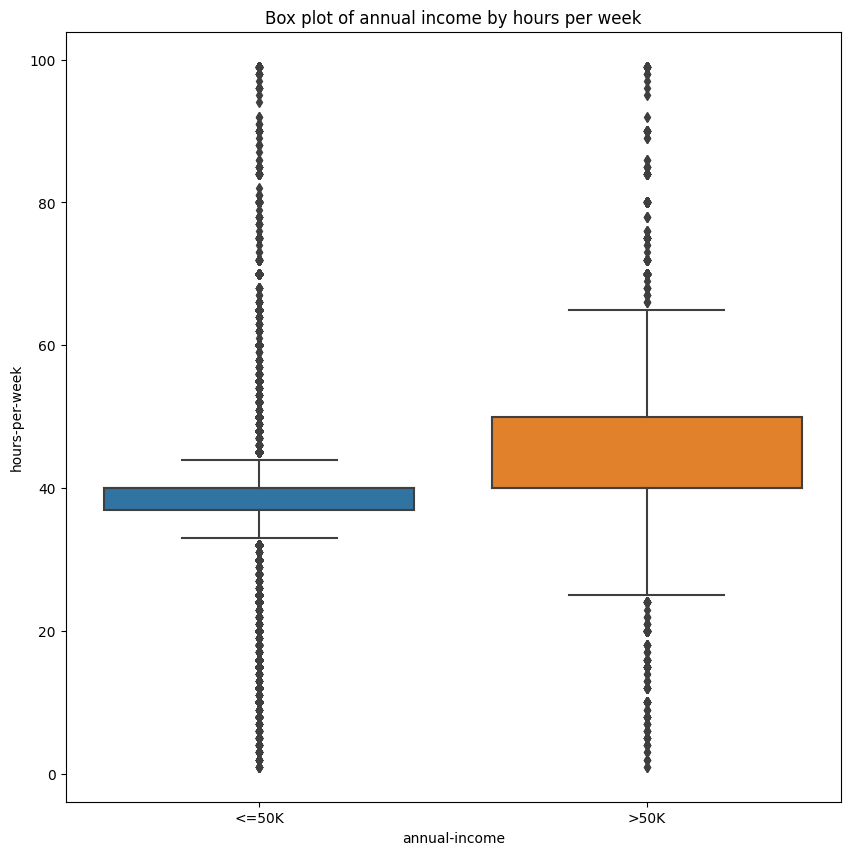

In [49]:
# boxplot
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="annual-income", y="hours-per-week", data=df).set_title("Box plot of annual income by hours per week")
plt.show()

In [50]:
# mean
df[['annual-income', 'hours-per-week']].groupby(['annual-income'], as_index=False).mean().sort_values(by='hours-per-week', ascending=False)

,annual-income,hours-per-week
1,>50K,45.582293
0,<=50K,39.372023


In [51]:
# t-test
import random

data = df[(np.abs(stats.zscore(df["hours-per-week"])) < 3)] 

income_1 = data[data['annual-income']==">50K"]['hours-per-week']
income_0 = data[data['annual-income']=="<=50K"]['hours-per-week']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.979275153034064
p value 9.699244228045246e-05
we reject null hypothesis


We reject the null hypothesis from the two-sample independent t-test i.e. there is significant difference in annual income by hours-per-week. Hence, We can count hours-per-week a discriminatory factor for our model.

### Relationship between workclass and annual income

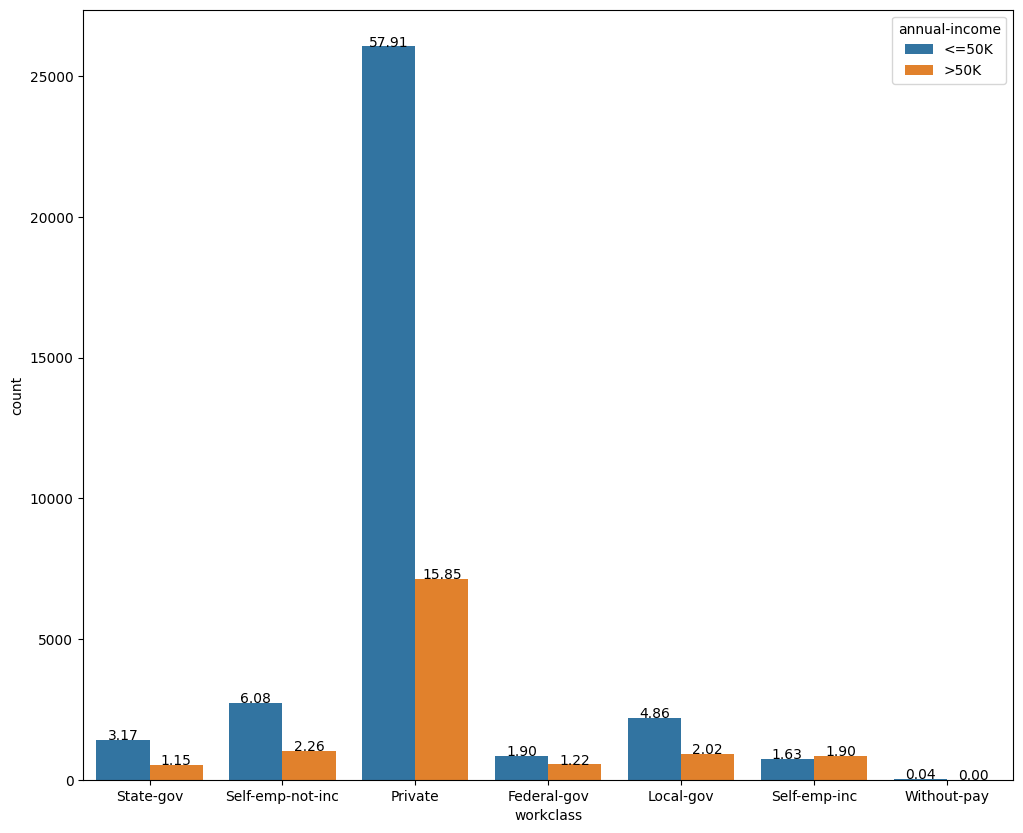

In [52]:
# histogram
plt.figure(figsize=(12,10))
total = float(len(df["annual-income"]) )

ax = sns.countplot(x="workclass", hue="annual-income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [53]:
# crosstab
pd.crosstab(df['workclass'],df['annual-income'])

annual-income,<=50K,>50K
workclass,,
Federal-gov,857,547
Local-gov,2185,909
Private,26056,7131
Self-emp-inc,734,855
Self-emp-not-inc,2737,1019
State-gov,1426,516
Without-pay,19,2


In [54]:
# contingency table
c_t = pd.crosstab(df['workclass'].sample(frac=0.002, replace=True, random_state=1),df['annual-income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual-income,<=50K,>50K
workclass,,
Federal-gov,2,1
Local-gov,0,2
Private,61,9
Self-emp-inc,5,0
Self-emp-not-inc,3,2
State-gov,4,1


In [55]:
# chi square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
p_value 0.013635700737287638
[[ 2.5         0.5       ]
 [ 1.66666667  0.33333333]
 [58.33333333 11.66666667]
 [ 4.16666667  0.83333333]
 [ 4.16666667  0.83333333]
 [ 4.16666667  0.83333333]]
probability=0.950, critical=11.070, stat=14.331
Dependent (reject H0)


We reject the null hypothesis from the chi-squared test i.e. there is dependency between workclass and annual-income. We can keep workclass in our feature set.

### Relationship between education and annual income

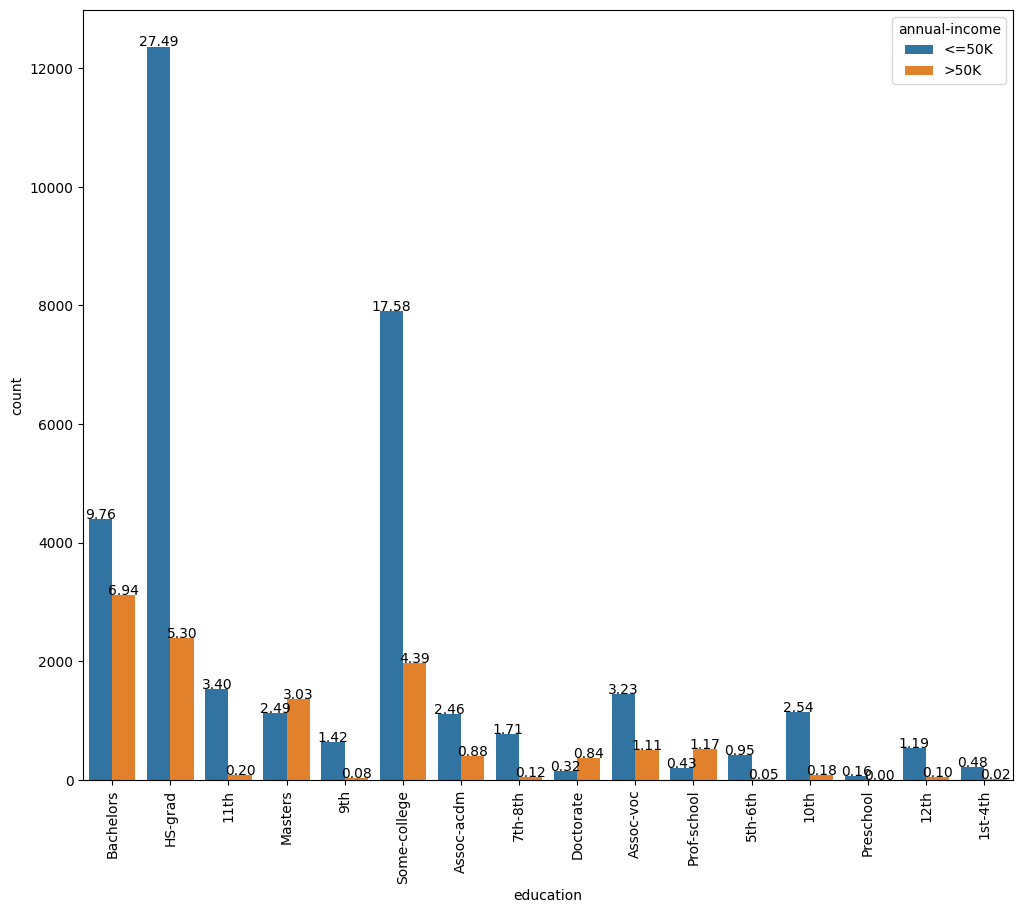

In [56]:
# histogram
plt.figure(figsize=(12,10))
total = float(len(df["annual-income"]) )

ax = sns.countplot(x="education", hue="annual-income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.xticks(rotation=90)
plt.show()

In [57]:
# crosstab
pd.crosstab(df['education'],df['annual-income'])

annual-income,<=50K,>50K
education,,
10th,1141,80
11th,1530,89
12th,534,43
1st-4th,214,8
5th-6th,427,21
7th-8th,768,55
9th,638,37
Assoc-acdm,1109,398
Assoc-voc,1455,501


In [58]:
# contingency table
c_t = pd.crosstab(df['education'].sample(frac=0.002, replace=True, random_state=1),df['annual-income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual-income,<=50K,>50K
education,,
10th,0,1
11th,2,0
12th,1,0
5th-6th,2,0
7th-8th,2,0
9th,2,0
Assoc-acdm,5,1
Assoc-voc,3,1
Bachelors,11,5


In [59]:
# chi-sqaured test
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=12
p_value 0.19516031384342541
[[ 0.83333333  0.16666667]
 [ 1.66666667  0.33333333]
 [ 0.83333333  0.16666667]
 [ 1.66666667  0.33333333]
 [ 1.66666667  0.33333333]
 [ 1.66666667  0.33333333]
 [ 5.          1.        ]
 [ 3.33333333  0.66666667]
 [13.33333333  2.66666667]
 [ 0.83333333  0.16666667]
 [26.66666667  5.33333333]
 [ 4.16666667  0.83333333]
 [13.33333333  2.66666667]]
probability=0.950, critical=21.026, stat=15.915
Independent (fail to reject H0)


We cannot reject the null hypothesis from the chi-squared test i.e. there is no dependency between education and annual-income. We will exclude education from our feature set.

### Relationship between education num and annual income

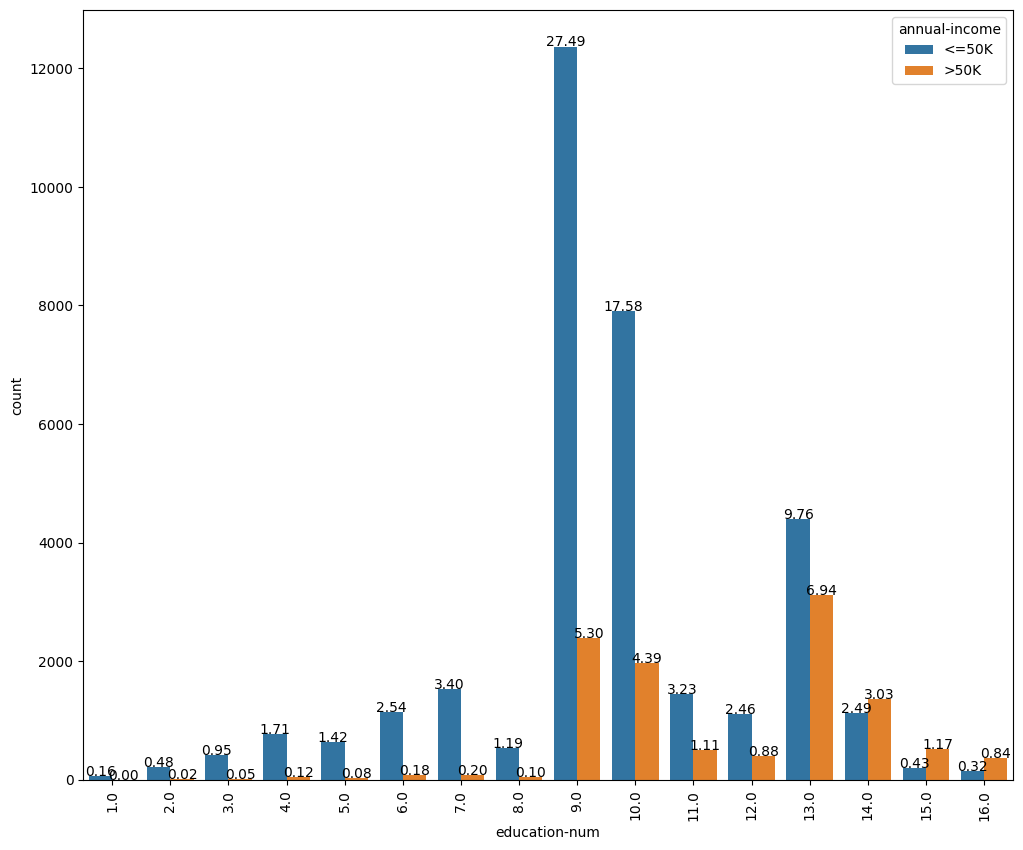

In [60]:
# histogram
plt.figure(figsize=(12,10))
total = float(len(df["annual-income"]) )

ax = sns.countplot(x="education-num", hue="annual-income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.xticks(rotation=90)
plt.show()

In [61]:
# crosstab
pd.crosstab(df['education-num'],df['annual-income'])

annual-income,<=50K,>50K
education-num,,
1.0,71,1
2.0,214,8
3.0,427,21
4.0,768,55
5.0,638,37
6.0,1141,80
7.0,1530,89
8.0,534,43
9.0,12367,2384


In [62]:
# contingency table
c_t = pd.crosstab(df['education-num'].sample(frac=0.002, replace=True, random_state=1),df['annual-income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual-income,<=50K,>50K
education-num,,
3.0,2,0
4.0,2,0
5.0,2,0
6.0,0,1
7.0,2,0
8.0,1,0
9.0,29,3
10.0,14,2
11.0,3,1


In [63]:
# chi-sqaured test
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=12
p_value 0.19516031384342544
[[ 1.66666667  0.33333333]
 [ 1.66666667  0.33333333]
 [ 1.66666667  0.33333333]
 [ 0.83333333  0.16666667]
 [ 1.66666667  0.33333333]
 [ 0.83333333  0.16666667]
 [26.66666667  5.33333333]
 [13.33333333  2.66666667]
 [ 3.33333333  0.66666667]
 [ 5.          1.        ]
 [13.33333333  2.66666667]
 [ 4.16666667  0.83333333]
 [ 0.83333333  0.16666667]]
probability=0.950, critical=21.026, stat=15.915
Independent (fail to reject H0)


We cannot reject the null hypothesis from the chi-squared test i.e. there is no dependency between education-num and annual-income as expected. We will exclude education from our feature set.

### Relationship between marital status and annual income

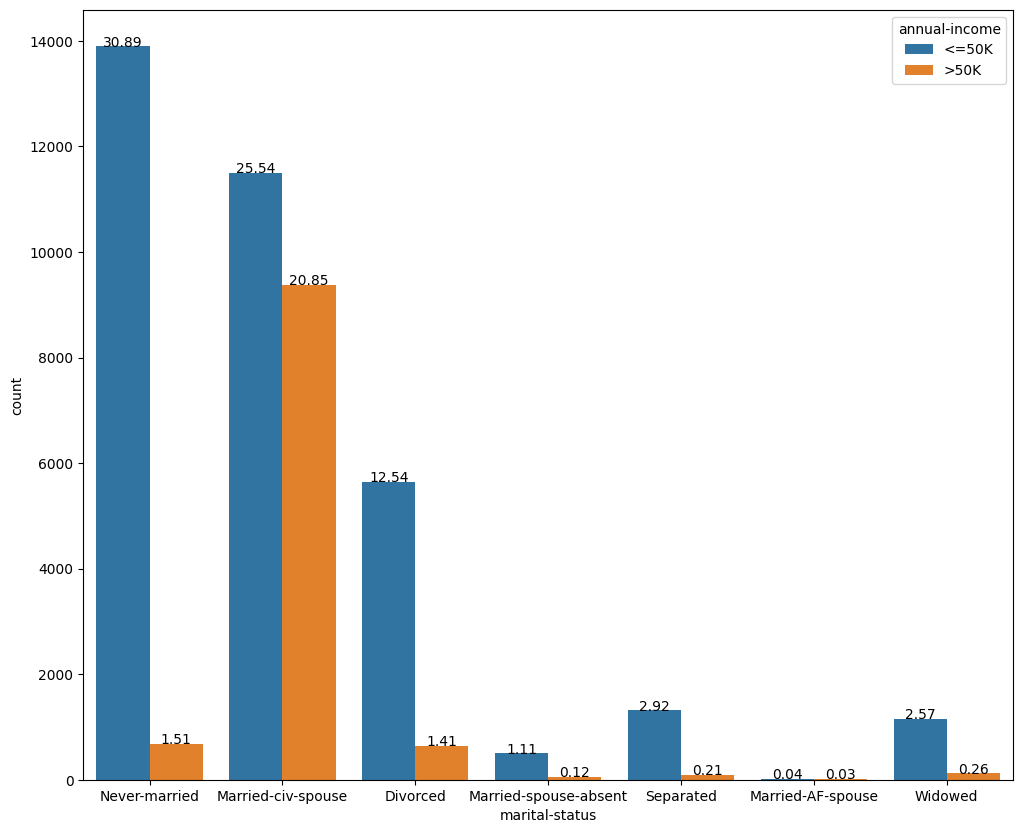

In [64]:
# histogram
plt.figure(figsize=(12,10))
total = float(len(df["annual-income"]) )

ax = sns.countplot(x="marital-status", hue="annual-income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

In [65]:
# crosstab
pd.crosstab(df['marital-status'],df['annual-income'])

annual-income,<=50K,>50K
marital-status,,
Divorced,5642,635
Married-AF-spouse,18,13
Married-civ-spouse,11491,9383
Married-spouse-absent,498,53
Never-married,13897,681
Separated,1312,95
Widowed,1156,119


In [66]:
# contingency table
c_t = pd.crosstab(df['marital-status'].sample(frac=0.002, replace=True, random_state=1),df['annual-income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual-income,<=50K,>50K
marital-status,,
Divorced,16,1
Married-civ-spouse,18,12
Married-spouse-absent,2,1
Never-married,34,1
Separated,3,0
Widowed,2,0


In [67]:
# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
p_value 0.0014920475984894538
[[14.16666667  2.83333333]
 [25.          5.        ]
 [ 2.5         0.5       ]
 [29.16666667  5.83333333]
 [ 2.5         0.5       ]
 [ 1.66666667  0.33333333]]
probability=0.950, critical=11.070, stat=19.589
Dependent (reject H0)


We reject the null hypothesis from the chi-squared test i.e. there is dependency between marital-status and annual-income. We will include marital-status in our feature set.

### Relationship between occupation and annual income

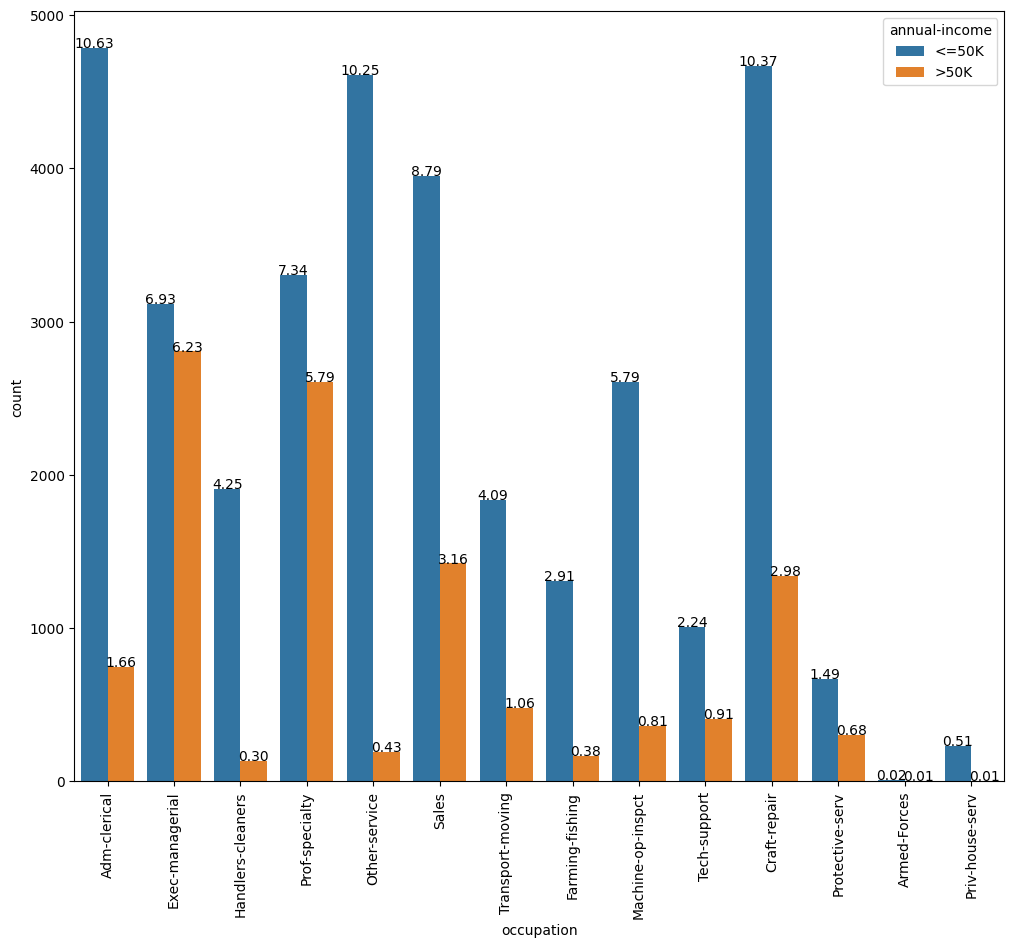

In [68]:
# histogram
plt.figure(figsize=(12,10))
total = float(len(df["annual-income"]) )

ax = sns.countplot(x="occupation", hue="annual-income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.xticks(rotation=90)
plt.show()

In [69]:
# crosstab
pd.crosstab(df['occupation'],df['annual-income'])

annual-income,<=50K,>50K
occupation,,
Adm-clerical,4784,748
Armed-Forces,10,4
Craft-repair,4665,1340
Exec-managerial,3117,2805
Farming-fishing,1308,169
Handlers-cleaners,1911,133
Machine-op-inspct,2605,364
Other-service,4612,193
Priv-house-serv,229,3


In [70]:
# contingency table
c_t = pd.crosstab(df['occupation'].sample(frac=0.002, replace=True, random_state=1),df['annual-income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual-income,<=50K,>50K
occupation,,
Adm-clerical,11,2
Craft-repair,11,2
Exec-managerial,9,3
Farming-fishing,3,0
Handlers-cleaners,2,0
Machine-op-inspct,5,0
Other-service,9,1
Prof-specialty,4,4
Protective-serv,2,0


In [71]:
# chi-sqaured test
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=11
p_value 0.4431988367023755
[[10.83333333  2.16666667]
 [10.83333333  2.16666667]
 [10.          2.        ]
 [ 2.5         0.5       ]
 [ 1.66666667  0.33333333]
 [ 4.16666667  0.83333333]
 [ 8.33333333  1.66666667]
 [ 6.66666667  1.33333333]
 [ 1.66666667  0.33333333]
 [13.33333333  2.66666667]
 [ 1.66666667  0.33333333]
 [ 3.33333333  0.66666667]]
probability=0.950, critical=19.675, stat=11.001
Independent (fail to reject H0)


We cannot reject the null hypothesis from the chi-squared test i.e. there is no dependency between occupation and annual-income. We will exclude occupation from our feature set.

### Relationship between relationship and annual income

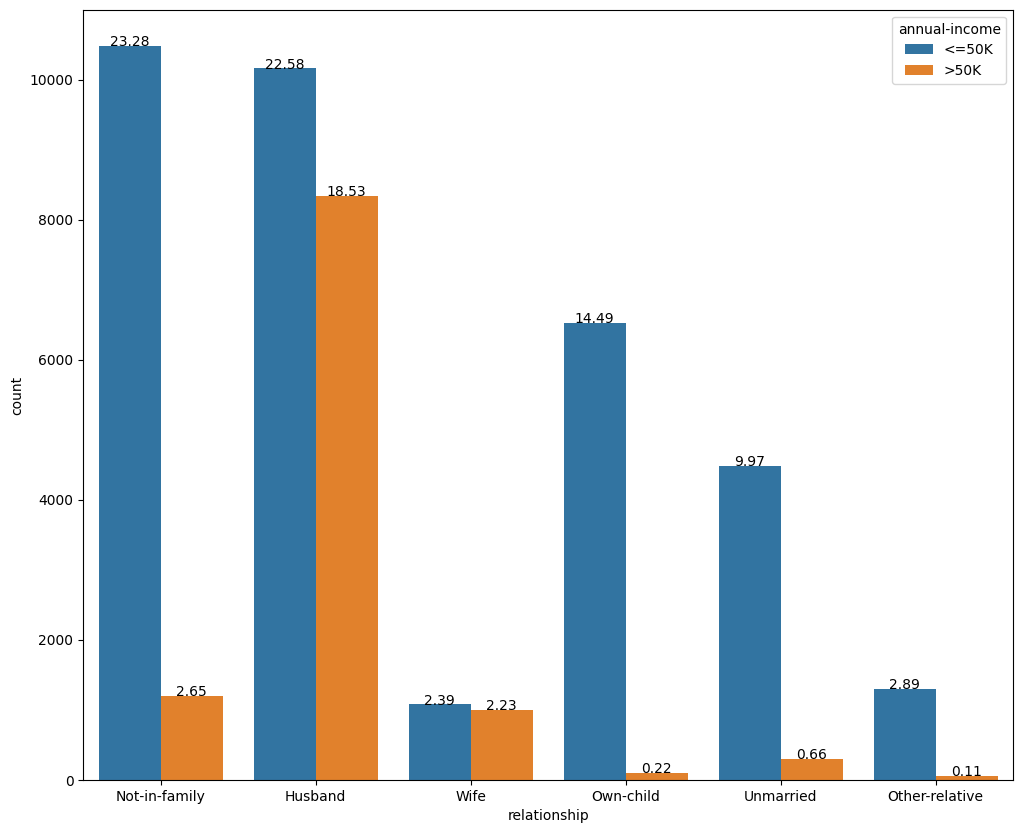

In [72]:
# histogram
plt.figure(figsize=(12,10))
total = float(len(df["annual-income"]) )

ax = sns.countplot(x="relationship", hue="annual-income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
#plt.xticks(rotation=90)
plt.show()

In [73]:
# crosstab
pd.crosstab(df['relationship'],df['annual-income'])

annual-income,<=50K,>50K
relationship,,
Husband,10159,8339
Not-in-family,10474,1192
Other-relative,1299,50
Own-child,6521,101
Unmarried,4486,295
Wife,1075,1002


In [74]:
# contingency table
c_t = pd.crosstab(df['relationship'].sample(frac=0.002, replace=True, random_state=1),df['annual-income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual-income,<=50K,>50K
relationship,,
Husband,15,9
Not-in-family,24,3
Other-relative,6,0
Own-child,16,0
Unmarried,12,0
Wife,2,3


In [75]:
# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
p_value 0.000607526244582496
[[20.          4.        ]
 [22.5         4.5       ]
 [ 5.          1.        ]
 [13.33333333  2.66666667]
 [10.          2.        ]
 [ 4.16666667  0.83333333]]
probability=0.950, critical=11.070, stat=21.660
Dependent (reject H0)


We reject the null hypothesis from the chi-squared test i.e. there is dependency between relationship and annual-income. Relationship will remain in our feature set.

### Relationship between race and annual income

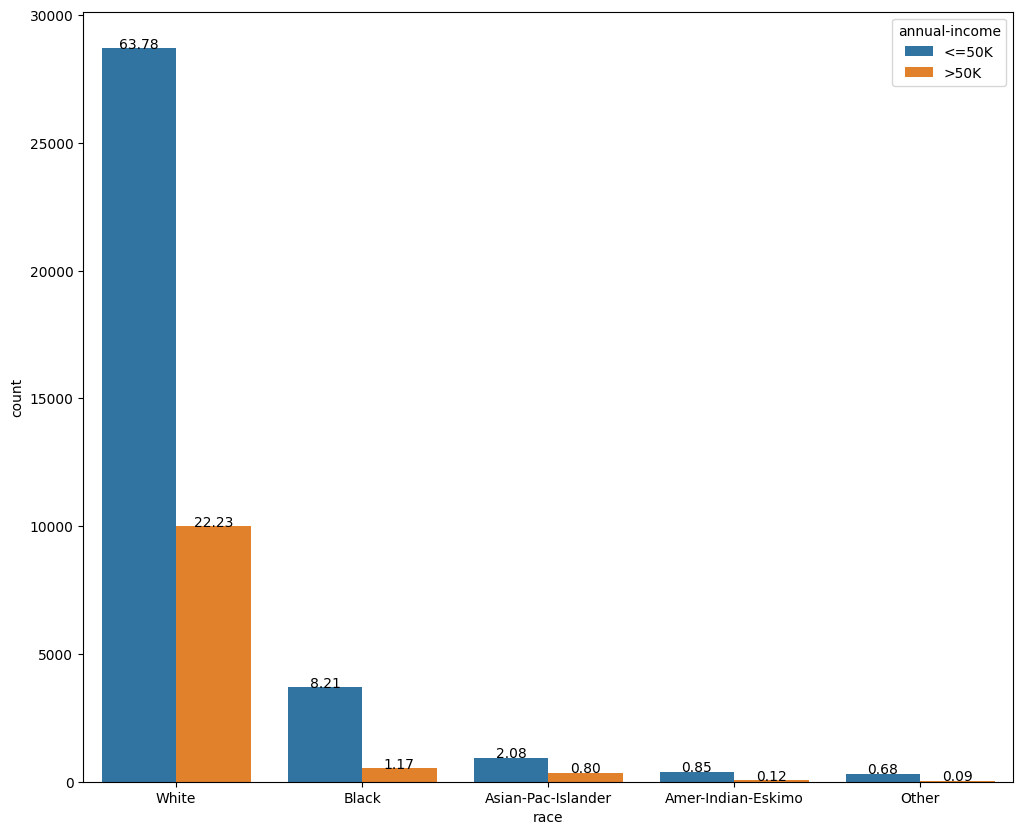

In [76]:
# histogram
plt.figure(figsize=(12,10))
total = float(len(df["annual-income"]) )

ax = sns.countplot(x="race", hue="annual-income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
#plt.xticks(rotation=90)
plt.show()

In [77]:
# crosstab
pd.crosstab(df['race'],df['annual-income'])

annual-income,<=50K,>50K
race,,
Amer-Indian-Eskimo,382,53
Asian-Pac-Islander,934,358
Black,3694,525
Other,308,42
White,28696,10001


In [78]:
# contingency table
c_t = pd.crosstab(df['race'].sample(frac=0.002, replace=True, random_state=1),df['annual-income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual-income,<=50K,>50K
race,,
Amer-Indian-Eskimo,1,0
Asian-Pac-Islander,1,1
Black,14,2
Other,1,0
White,58,12


In [79]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
p_value 0.6969374959913187
[[ 0.83333333  0.16666667]
 [ 1.66666667  0.33333333]
 [13.33333333  2.66666667]
 [ 0.83333333  0.16666667]
 [58.33333333 11.66666667]]
probability=0.950, critical=9.488, stat=2.211
Independent (fail to reject H0)


We cannot reject the null hypothesis from the chi-squared test i.e. there is no dependency between race and annual-income. We will exclude race from our feature set.

### Relationship between sex and annual income

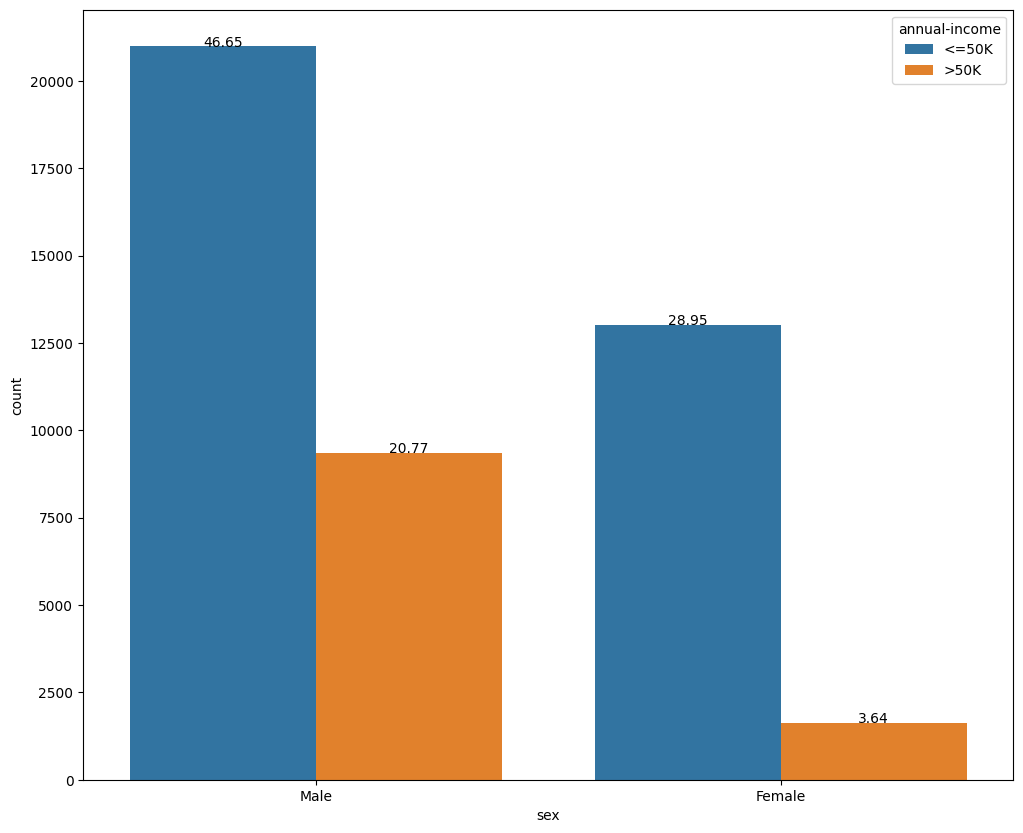

In [80]:
# histogram
plt.figure(figsize=(12,10))
total = float(len(df["annual-income"]) )

ax = sns.countplot(x="sex", hue="annual-income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
#plt.xticks(rotation=90)
plt.show()

In [81]:
# crosstab
pd.crosstab(df['sex'],df['annual-income'])

annual-income,<=50K,>50K
sex,,
Female,13026,1636
Male,20988,9343


In [82]:
# contingency table
c_t = pd.crosstab(df['sex'].sample(frac=0.002, replace=True, random_state=1),df['annual-income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual-income,<=50K,>50K
sex,,
Female,29,5
Male,46,10


In [83]:
# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
p_value 0.9225433008087743
[[28.33333333  5.66666667]
 [46.66666667  9.33333333]]
probability=0.950, critical=3.841, stat=0.009
Independent (fail to reject H0)


We cannot reject the null hypothesis from the chi-squared test i.e. there is no dependency between sex and annual-income. We will exclude sex from our feature set.

### Relationship between native country and annual income

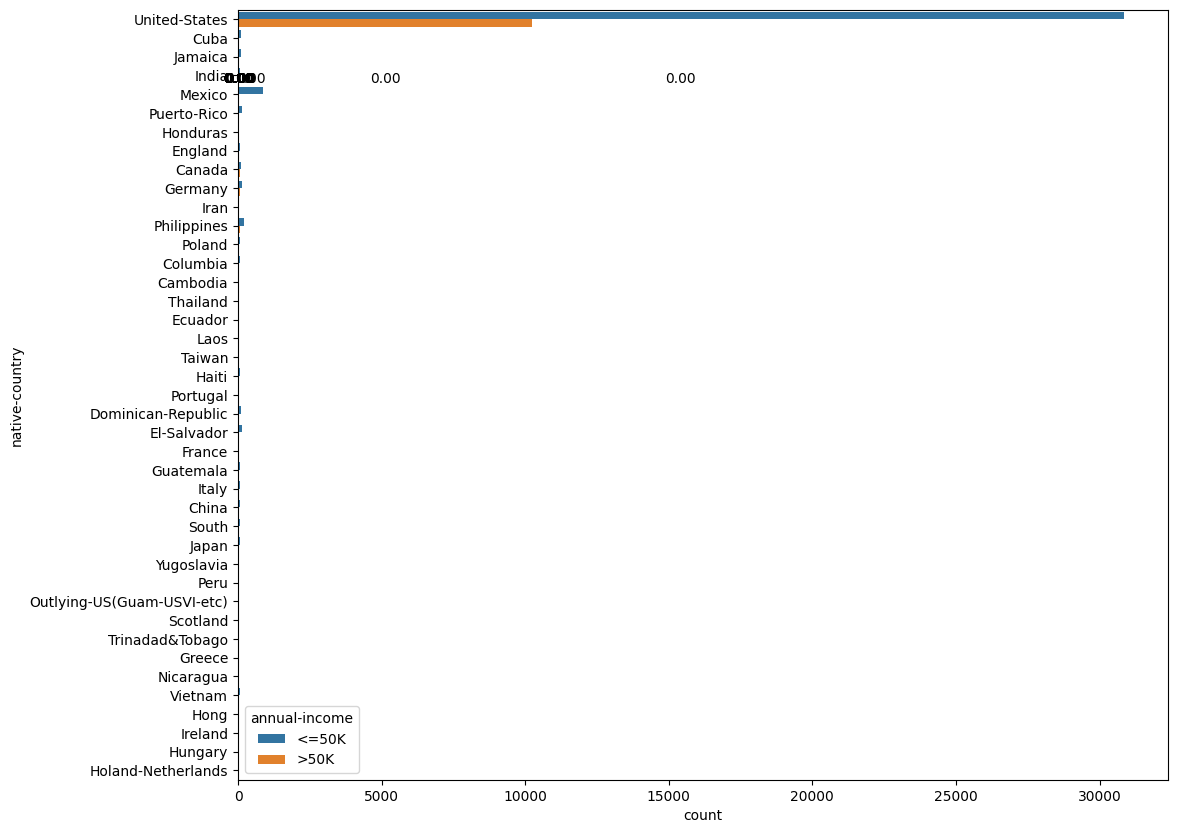

In [84]:
# histogram
plt.figure(figsize=(12,10))
total = float(len(df["annual-income"]) )

ax = sns.countplot(y="native-country", hue="annual-income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
#plt.xticks(rotation=90)
plt.show()

In [85]:
# crosstab
pd.crosstab(df['native-country'],df['annual-income'])

annual-income,<=50K,>50K
native-country,,
Cambodia,17,9
Canada,103,59
China,77,35
Columbia,78,4
Cuba,99,34
Dominican-Republic,92,4
Ecuador,37,6
El-Salvador,136,11
England,72,47


In [86]:
# contingency table
c_t = pd.crosstab(df['native-country'].sample(frac=0.002, replace=True, random_state=1),df['annual-income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual-income,<=50K,>50K
native-country,,
Germany,2,0
Haiti,0,1
Mexico,5,0
Puerto-Rico,1,0
United-States,67,14


In [87]:
# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
p_value 0.15725046256468317
[[ 1.66666667  0.33333333]
 [ 0.83333333  0.16666667]
 [ 4.16666667  0.83333333]
 [ 0.83333333  0.16666667]
 [67.5        13.5       ]]
probability=0.950, critical=9.488, stat=6.622
Independent (fail to reject H0)


We cannot reject the null hypothesis from the chi-squared test i.e. there is no dependency between native country and annual-income. We will exclude native country from our feature set.

## Multivariate Analysis

### Correlation Matrix

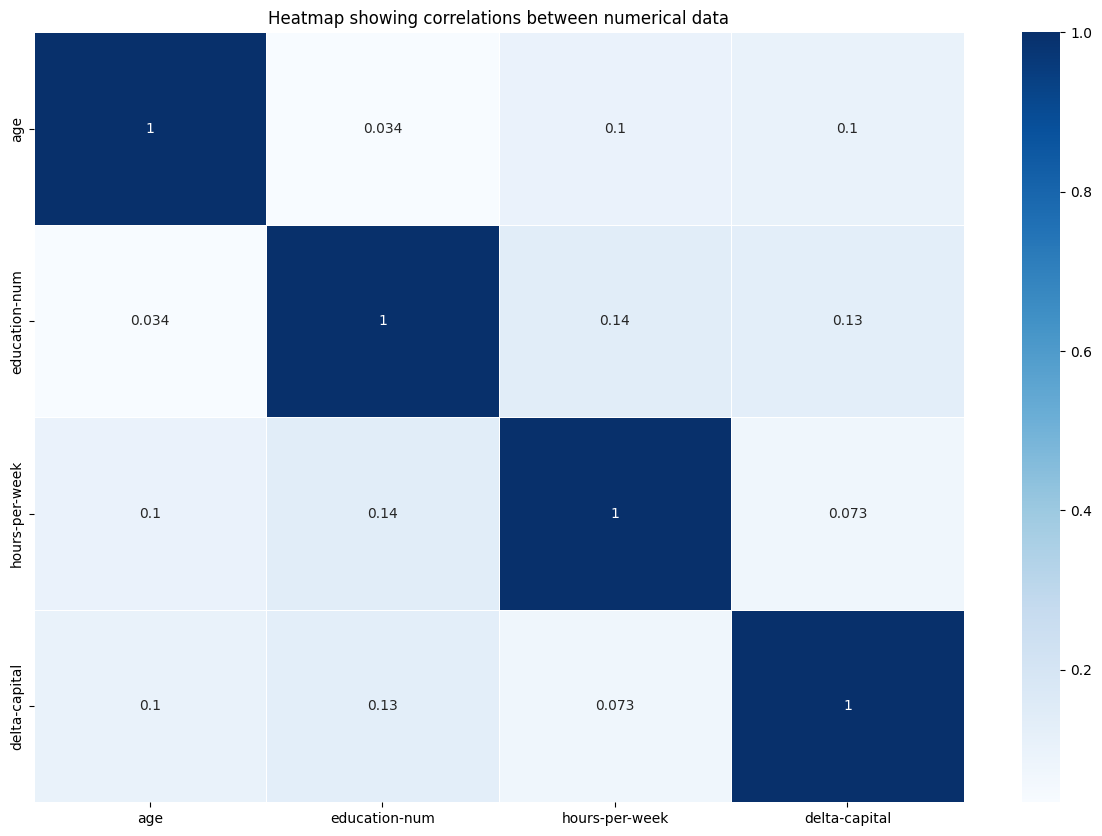

In [88]:
plt.figure(figsize=(15,10))  
sns.heatmap(df.select_dtypes(include=[np.number]).corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

### Multivariate Categorical Analysis

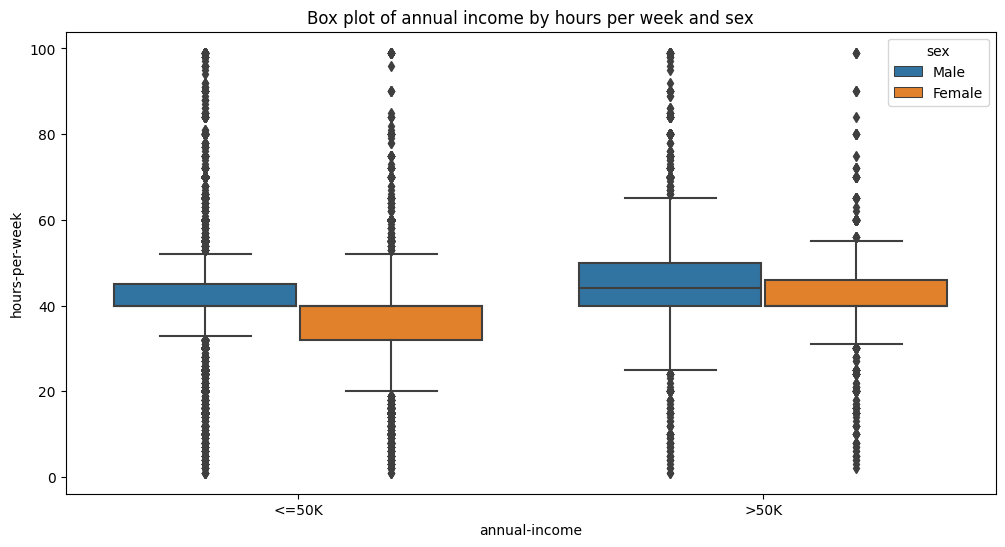

In [89]:
plt.figure(figsize=(12,6))
sns.boxplot(x='annual-income',y ='hours-per-week', hue='sex',data=df).set_title("Box plot of annual income by hours per week and sex")
plt.show()

## Conclusion of Exploratory Data Analysis
We have completed our feature set from the exploratory data analysis by running thorough statistical analyses and visualizations. As per our result, these numerical features are significant for our model:
1) age
2) hours-per-week

And, these categorical features are significant:
1) relationship
2) marital-status
3) delta-capital
4) workclass

These 6 features constitute our feature set for now. By the exploratory data analysis, we have also been successful in-
A) Feature Engineering: New feature "delta-capital" was constructed which is significant and also helped us to remove 2 features (capital-gain and capital-loss).
B) Outlier detection & removal: In delta-capital, we identified outliers and removed them (~0.5%) which retained the overall data structure and improved data quality.

# Models
As this is a binary classification problem, we will be deploying and evaluating 3 models here:
- Logistic Regression
- Random Forest
- Gaussian Naive Bayes

Even though our feature set is rigorous from EDA, we will run a Chi-squared test of dependency between "marital-status" and "relationship" variables. These two features may contain some similarity as they are derived from the same information regarding family. Furthermore, we will need to encode the categorical variables. Instead of labeling, we may need to go for target encoding or probabilistic target encoding here. We will also need to normalize/standardize the data. Then, we shall split the dataset into the train & test part to evaluate all the models on the same test set.

We will also need to look out for the problem of multicollinearity and imbalanced dataset. Finally, a proper evaluation metric must be decided to evaluate the performance.

## Marital status and Relationship: Multicollinearity?

In [90]:
# crosstab
pd.crosstab(df['marital-status'],df['relationship'])

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
marital-status,,,,,,
Divorced,0,3419,166,429,2263,0
Married-AF-spouse,11,0,1,1,0,18
Married-civ-spouse,18487,19,184,125,0,2059
Married-spouse-absent,0,281,44,57,169,0
Never-married,0,6676,820,5860,1222,0
Separated,0,584,75,130,618,0
Widowed,0,687,59,20,509,0


In [91]:
# contingency table
c_t = pd.crosstab(df['marital-status'].sample(frac=0.002, replace=True, random_state=1),df['relationship'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
marital-status,,,,,,
Divorced,0,7,2,0,8,0
Married-civ-spouse,24,0,0,1,0,5
Married-spouse-absent,0,3,0,0,0,0
Never-married,0,14,4,15,2,0
Separated,0,3,0,0,0,0
Widowed,0,0,0,0,2,0


In [92]:
# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=25
p_value 2.9251496039601857e-17
[[ 4.53333333  5.1         1.13333333  3.02222222  2.26666667  0.94444444]
 [ 8.          9.          2.          5.33333333  4.          1.66666667]
 [ 0.8         0.9         0.2         0.53333333  0.4         0.16666667]
 [ 9.33333333 10.5         2.33333333  6.22222222  4.66666667  1.94444444]
 [ 0.8         0.9         0.2         0.53333333  0.4         0.16666667]
 [ 0.53333333  0.6         0.13333333  0.35555556  0.26666667  0.11111111]]
probability=0.950, critical=37.652, stat=136.102
Dependent (reject H0)


As it turned out, marital-status and relationship are dependent (as we already suspected). After encoding these two categorical variables, we will go into VIF test.

## Encoding categorical variables
We will denote the annual income of >50K as 1 and <=50K as 0. For the X categorical variables, we will go for probabilistic target encoding.

In [93]:
# Encoding (1/0) for target variable
cat = pd.get_dummies(df["annual-income"], drop_first = True)
df_cat = pd.concat((df, cat), axis=1)
df_cat = df_cat.drop(['annual-income'], axis=1)
df_cat

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,delta-capital,>50K
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,2174.0,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,0.0,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,0.0,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,0.0,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,40.0,United-States,0.0,0
48837,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,36.0,United-States,0.0,0
48839,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,50.0,United-States,0.0,0
48840,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40.0,United-States,5455.0,0


In [94]:
# Target encoding for marital-status
prob=df_cat.groupby(['marital-status'])['>50K'].mean()
prob_df=pd.DataFrame(prob)
prob_df=pd.DataFrame(prob)
prob_df['<=50K']=1-prob_df['>50K']
prob_df['Probability Ratio']=prob_df['>50K']/prob_df['<=50K']
prob_encod_dictionary=prob_df['Probability Ratio'].to_dict()
df_cat['marital-status-ratio']=df_cat['marital-status'].map(prob_encod_dictionary)
df_cat.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,delta-capital,>50K,marital-status-ratio
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,2174.0,0,0.049003
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,0.0,0,0.816552
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,0.0,0,0.112549
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,0.0,0,0.816552
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,0.0,0,0.816552


In [95]:
# Target encoding for relationship
prob=df_cat.groupby(['relationship'])['>50K'].mean()
prob_df=pd.DataFrame(prob)
prob_df['<=50K']=1-prob_df['>50K']
prob_df['Probability Ratio']=prob_df['>50K']/prob_df['<=50K']
prob_encod_dictionary=prob_df['Probability Ratio'].to_dict()
df_cat['relationship-ratio']=df_cat['relationship'].map(prob_encod_dictionary)
df_cat.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,delta-capital,>50K,marital-status-ratio,relationship-ratio
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,2174.0,0,0.049003,0.113806
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,0.0,0,0.816552,0.820849
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,0.0,0,0.112549,0.113806
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,0.0,0,0.816552,0.820849
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,0.0,0,0.816552,0.932093


In [96]:
# Target encoding for workclass
prob=df_cat.groupby(['workclass'])['>50K'].mean()
prob_df=pd.DataFrame(prob)
prob_df['<=50K']=1-prob_df['>50K']
prob_df['Probability Ratio']=prob_df['>50K']/prob_df['<=50K']
prob_encod_dictionary=prob_df['Probability Ratio'].to_dict()
df_cat['workclass-ratio']=df_cat['workclass'].map(prob_encod_dictionary)
df_cat.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,delta-capital,>50K,marital-status-ratio,relationship-ratio,workclass-ratio
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,2174.0,0,0.049003,0.113806,0.361851
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,0.0,0,0.816552,0.820849,0.372305
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,0.0,0,0.112549,0.113806,0.273680
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,0.0,0,0.816552,0.820849,0.273680
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,0.0,0,0.816552,0.932093,0.273680


In [97]:
# Dropping the unnecessary and duplicate columns
df_main = df_cat.drop(['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'],
                     axis=1)
df_main

,age,hours-per-week,delta-capital,>50K,marital-status-ratio,relationship-ratio,workclass-ratio
0,39,40.0,2174.0,0,0.049003,0.113806,0.361851
1,50,13.0,0.0,0,0.816552,0.820849,0.372305
2,38,40.0,0.0,0,0.112549,0.113806,0.273680
3,53,40.0,0.0,0,0.816552,0.820849,0.273680
4,28,40.0,0.0,0,0.816552,0.932093,0.273680
...,...,...,...,...,...,...,...
48836,33,40.0,0.0,0,0.049003,0.015488,0.273680
48837,39,36.0,0.0,0,0.112549,0.113806,0.273680
48839,38,50.0,0.0,0,0.816552,0.820849,0.273680
48840,44,40.0,5455.0,0,0.112549,0.015488,0.273680


## Standardizing Feature Set
We have age, hours-per-week and delta-capital whose units are years, hours and dollars respectively with varying ranges. This is why we need to standardize them. Logistic Regression assumes binomial probability distribution as well.

In [98]:
from sklearn.preprocessing import StandardScaler
df_main[['age', 'hours-per-week', 'delta-capital']] = StandardScaler().fit_transform(df_main[['age', 'hours-per-week', 'delta-capital']])
df_main

,age,hours-per-week,delta-capital,>50K,marital-status-ratio,relationship-ratio,workclass-ratio
0,0.037252,-0.074059,0.635266,0,0.049003,0.113806,0.361851
1,0.869469,-2.327318,-0.194218,0,0.816552,0.820849,0.372305
2,-0.038404,-0.074059,-0.194218,0,0.112549,0.113806,0.273680
3,1.096438,-0.074059,-0.194218,0,0.816552,0.820849,0.273680
4,-0.794965,-0.074059,-0.194218,0,0.816552,0.932093,0.273680
...,...,...,...,...,...,...,...
48836,-0.416684,-0.074059,-0.194218,0,0.049003,0.015488,0.273680
48837,0.037252,-0.407875,-0.194218,0,0.112549,0.113806,0.273680
48839,-0.038404,0.760481,-0.194218,0,0.816552,0.820849,0.273680
48840,0.415533,-0.074059,1.887121,0,0.112549,0.015488,0.273680


## Multicollinearity Test

In [99]:
# correlation
df_main.corr()

,age,hours-per-week,delta-capital,>50K,marital-status-ratio,relationship-ratio,workclass-ratio
age,1.000000,0.100464,0.104338,0.234130,0.328106,0.328060,0.155725
hours-per-week,0.100464,1.000000,0.073258,0.222599,0.227597,0.232395,0.125499
delta-capital,0.104338,0.073258,1.000000,0.278057,0.090984,0.093188,0.071764
>50K,0.234130,0.222599,0.278057,1.000000,0.447275,0.452557,0.156016
marital-status-ratio,0.328106,0.227597,0.090984,0.447275,1.000000,0.978280,0.126962
relationship-ratio,0.328060,0.232395,0.093188,0.452557,0.978280,1.000000,0.127243
workclass-ratio,0.155725,0.125499,0.071764,0.156016,0.126962,0.127243,1.000000


The correlation value between marital-status-ratio and relationship-ratio is extremely high (0.978280).

In [100]:
df_main.drop('marital-status-ratio', axis=1).corr()

,age,hours-per-week,delta-capital,>50K,relationship-ratio,workclass-ratio
age,1.000000,0.100464,0.104338,0.234130,0.328060,0.155725
hours-per-week,0.100464,1.000000,0.073258,0.222599,0.232395,0.125499
delta-capital,0.104338,0.073258,1.000000,0.278057,0.093188,0.071764
>50K,0.234130,0.222599,0.278057,1.000000,0.452557,0.156016
relationship-ratio,0.328060,0.232395,0.093188,0.452557,1.000000,0.127243
workclass-ratio,0.155725,0.125499,0.071764,0.156016,0.127243,1.000000


In [101]:
df_main.drop('relationship-ratio', axis=1).corr()

,age,hours-per-week,delta-capital,>50K,marital-status-ratio,workclass-ratio
age,1.000000,0.100464,0.104338,0.234130,0.328106,0.155725
hours-per-week,0.100464,1.000000,0.073258,0.222599,0.227597,0.125499
delta-capital,0.104338,0.073258,1.000000,0.278057,0.090984,0.071764
>50K,0.234130,0.222599,0.278057,1.000000,0.447275,0.156016
marital-status-ratio,0.328106,0.227597,0.090984,0.447275,1.000000,0.126962
workclass-ratio,0.155725,0.125499,0.071764,0.156016,0.126962,1.000000


The correlation value does not change much for exclusion of any of those 2 features. It means we can remove any one of them. As marital-status is easier to interpret, we are removing relationship i.e. relationship-ratio from feature set.

In [102]:
df_main = df_main.drop('relationship-ratio', axis=1)
df_main

,age,hours-per-week,delta-capital,>50K,marital-status-ratio,workclass-ratio
0,0.037252,-0.074059,0.635266,0,0.049003,0.361851
1,0.869469,-2.327318,-0.194218,0,0.816552,0.372305
2,-0.038404,-0.074059,-0.194218,0,0.112549,0.273680
3,1.096438,-0.074059,-0.194218,0,0.816552,0.273680
4,-0.794965,-0.074059,-0.194218,0,0.816552,0.273680
...,...,...,...,...,...,...
48836,-0.416684,-0.074059,-0.194218,0,0.049003,0.273680
48837,0.037252,-0.407875,-0.194218,0,0.112549,0.273680
48839,-0.038404,0.760481,-0.194218,0,0.816552,0.273680
48840,0.415533,-0.074059,1.887121,0,0.112549,0.273680


In [103]:
# VIF Score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_main.drop('>50K', axis=1).columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_main.drop('>50K', axis=1).values, i)
                          for i in range(len(df_main.drop('>50K', axis=1).columns))]
  
print(vif_data)

                feature       VIF
0                   age  1.077494
1        hours-per-week  1.035994
2         delta-capital  1.016057
3  marital-status-ratio  2.128422
4       workclass-ratio  2.005329


There are no VIF scores larger than 5. It means we have successfully solved the multicollinearity problem in our feature set.

## SMOTE: Synthetic Minority Over-sampling Technique
Our dataset is imbalanced in nature with minority class being 25%. Here we can use SMOTE to over-sample the minority class and feed into learning model. However, this must be done after train-test split so that our models could be tested on test sets that have inherent imbalancing. Here, we have illustrated the difference in correlation matrix for our dataset after balancing.

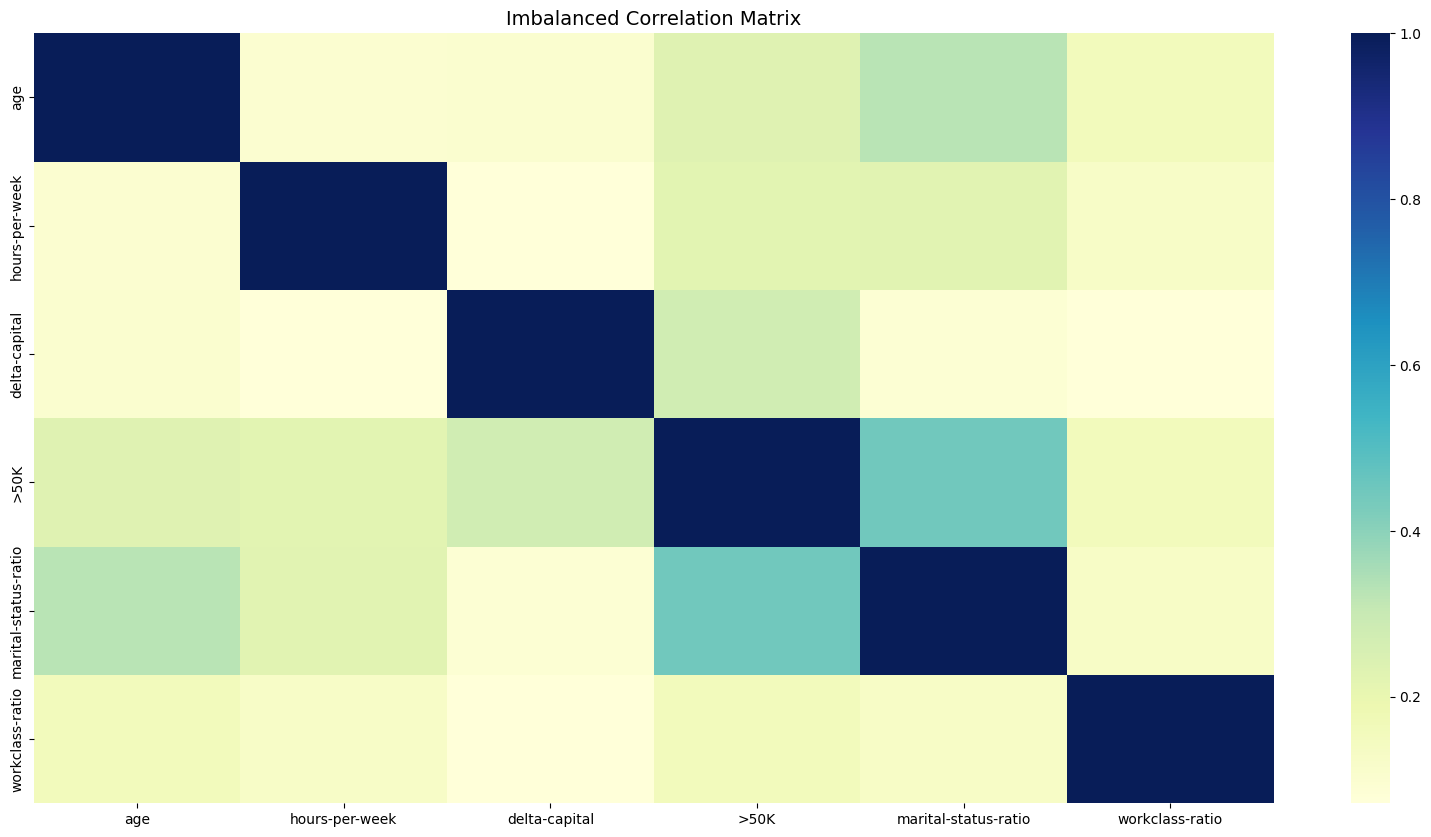

In [104]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = df_main.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [105]:
# over-sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=7)
oversampled_trainX, oversampled_trainY = sm.fit_resample(df_main.drop('>50K', axis=1), df_main['>50K'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.groupby(['>50K']).size().transform(lambda x: x/sum(x))

>50K
0    0.5
1    0.5
dtype: float64

As we can see, SMOTE has over-sampled the minority case and now our dataset is balanced in nature with 1:1. We will again this SMOTE technique each time after fitting a model to understand the improvement.

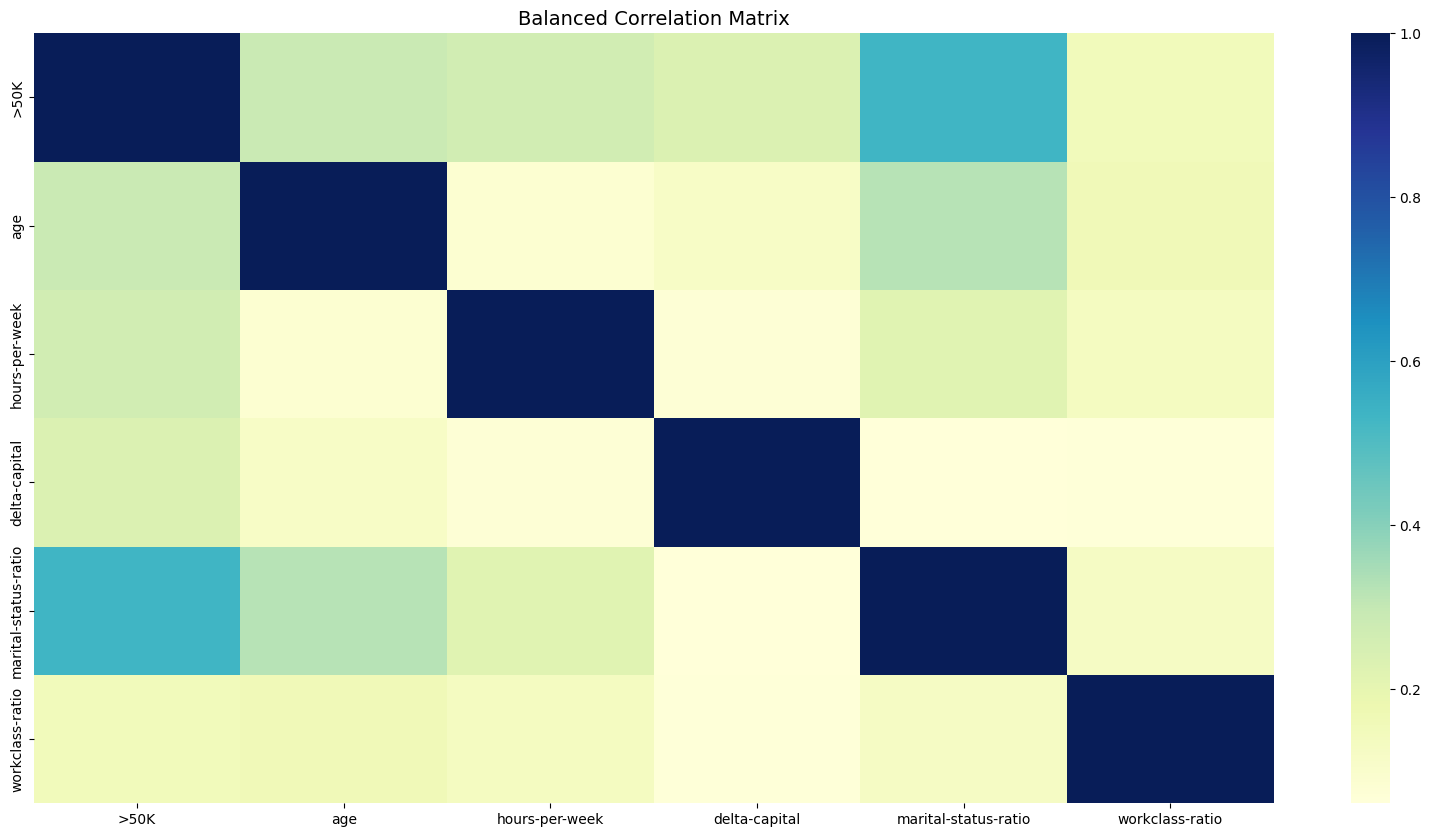

In [106]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = oversampled_train.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Balanced Correlation Matrix", fontsize=14)
plt.show()

The correlation values have increase after SMOTE indicating increase in discrimatory power among the feature set.

## Train-Test split
We will be dividing the dataset into 70:30 ratio for training & testing. As our imbalanced dataset is 75:25 in ratio for majority to minority, we wanted to match our train & test split accordingly. We also wanted to keep this simple. This exact test set will be used for every model evaluation.

In [107]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_main, test_size=0.3, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 31495
No. of testing examples: 13498


In [108]:
xtrain = training_data.drop('>50K', axis=1)
ytrain = training_data['>50K']
xtest = testing_data.drop('>50K', axis=1)
ytest = testing_data['>50K']

In [109]:
# % of >50K
ytrain.sum()/ytrain.count()

0.24368947451976505

In [110]:
ytest.sum()/ytest.count()

0.24477700400059269

In our training set we have 24.37% of the minority class, and it is 24.48% in case of test set.

## Evaluation Metric
Predictive accuracy can be a misleading in the presence of class-imbalance. In such cases, more weights are placed on the majority class than on the minority class making it more difficult for a classifier to perform well on the minority class. Whereas Area Under Curve (AUC) score represents the degree or measure of separability. A model with higher AUC is better at predicting True Positives and True Negatives. AUC score measures the total area underneath the ROC curve. AUC is scale invariant and also threshold invariant.

Hence, we are selecting AUC Score as the evaluation metric for model performance.

### Logistic Regression

In [112]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

logreg = LogisticRegression(class_weight="balanced")
logreg.fit(xtrain, ytrain) #This is where the training is taking place
y_pred_logreg = logreg.predict(xtest) #Making predictions to test the model on test data
print('Logistic Regression Train accuracy %s' % logreg.score(xtrain, ytrain)) #Train accuracy
print('Logistic Regression Test accuracy %s' % accuracy_score(y_pred_logreg, ytest)) #Test accuracy
print(confusion_matrix(ytest, y_pred_logreg)) #Confusion matrix
print(classification_report(ytest, y_pred_logreg)) #Classification Report

Logistic Regression Train accuracy 0.7225908874424511
Logistic Regression Test accuracy 0.7282560379315454
[[6946 3248]
 [ 420 2884]]
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     10194
           1       0.47      0.87      0.61      3304

    accuracy                           0.73     13498
   macro avg       0.71      0.78      0.70     13498
weighted avg       0.83      0.73      0.75     13498



The accuracy is 77% for training and 73% for testing set in case of logistic regression.

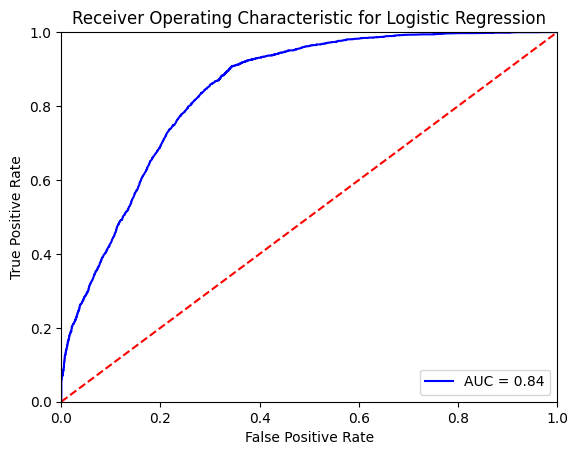

In [113]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC score is 0.84 for logistic Regression which is quite excellent in terms of discriminatory power.

Now we will apply SMOTE to our training set to over-sample the minority class and then test the model on the same testing set. Let's see if we can find any improvement.

### Logistic Regression using SMOTE

In [114]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=7)
oversampled_xtrain, oversampled_ytrain = sm.fit_resample(xtrain, ytrain)
oversampled_ytrain.sum()/oversampled_ytrain.count()

0.5

In [115]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

logreg = LogisticRegression(class_weight="balanced")
logreg.fit(oversampled_xtrain, oversampled_ytrain) #This is where the training is taking place
y_pred_logreg = logreg.predict(xtest) #Making predictions to test the model on test data
print('Logistic Regression Train accuracy %s' % logreg.score(oversampled_xtrain, oversampled_ytrain)) #Train accuracy
print('Logistic Regression Test accuracy %s' % accuracy_score(y_pred_logreg, ytest)) #Test accuracy
print(confusion_matrix(ytest, y_pred_logreg)) #Confusion matrix
print(classification_report(ytest, y_pred_logreg)) #Classification Report

Logistic Regression Train accuracy 0.7706968933669186
Logistic Regression Test accuracy 0.7270706771373536
[[6931 3263]
 [ 421 2883]]
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     10194
           1       0.47      0.87      0.61      3304

    accuracy                           0.73     13498
   macro avg       0.71      0.78      0.70     13498
weighted avg       0.83      0.73      0.75     13498



The accuracy score was same before applying SMOTE.

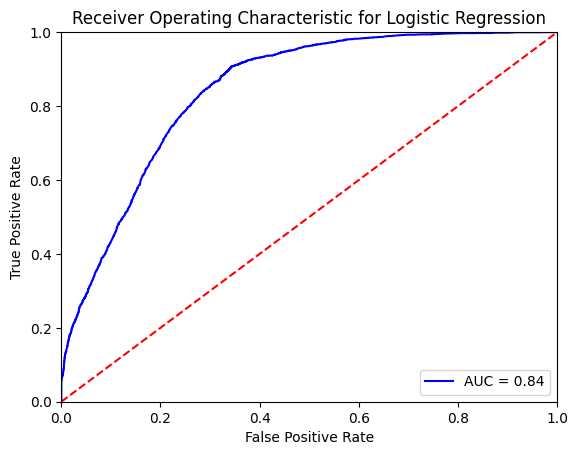

In [116]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC Score is also 0.84. This means over-sampling did not improve model performance. Logistic Regression was quite capable even if there was class imbalance.

### Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(xtrain, ytrain) #This is where the training is taking place
y_pred_clf = clf.predict(xtest) #Making predictions to test the model on test data
print('Random Forest Train accuracy %s' % clf.score(xtrain, ytrain)) #Train accuracy
print('Random Forest Test accuracy %s' % accuracy_score(y_pred_clf, ytest)) #Test accuracy
print(confusion_matrix(ytest, y_pred_clf)) #Confusion matrix
print(classification_report(ytest, y_pred_clf)) #Classification Report

Random Forest Train accuracy 0.796856643911732
Random Forest Test accuracy 0.7972292191435768
[[10188     6]
 [ 2731   573]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     10194
           1       0.99      0.17      0.30      3304

    accuracy                           0.80     13498
   macro avg       0.89      0.59      0.59     13498
weighted avg       0.84      0.80      0.74     13498



Both the training and the testing accuracy is 80%.

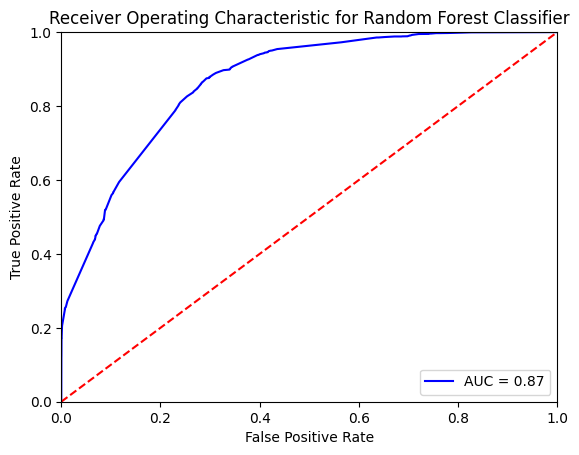

In [118]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest's AUC score of 0.87 is better compared to Logistic Regression.

### Random Forest using SMOTE

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(oversampled_xtrain, oversampled_ytrain) #This is where the training is taking place
y_pred_clf = clf.predict(xtest) #Making predictions to test the model on test data
print('Random Forest Train accuracy %s' % clf.score(oversampled_xtrain, oversampled_ytrain)) #Train accuracy
print('Random Forest Test accuracy %s' % accuracy_score(y_pred_clf, ytest)) #Test accuracy
print(confusion_matrix(ytest, y_pred_clf)) #Confusion matrix
print(classification_report(ytest, y_pred_clf)) #Classification Report

Random Forest Train accuracy 0.7847816960537364
Random Forest Test accuracy 0.7446288339013187
[[7152 3042]
 [ 405 2899]]
              precision    recall  f1-score   support

           0       0.95      0.70      0.81     10194
           1       0.49      0.88      0.63      3304

    accuracy                           0.74     13498
   macro avg       0.72      0.79      0.72     13498
weighted avg       0.83      0.74      0.76     13498



The accuracy score dropped for both train & test when using SMOTE.

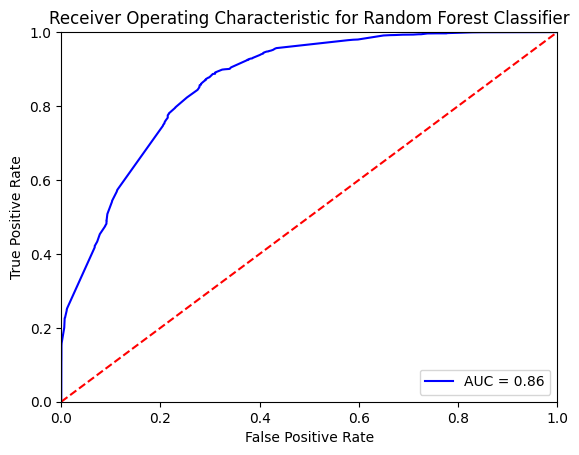

In [120]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC score dropped to 0.86 when using SMOTE. This means over-sampling did not improve model performance; rather it decreased the AUC score.

### Gaussian Naive Bayes

In [122]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

gnb = GaussianNB()
gnb.fit(xtrain, ytrain) #This is where the training is taking place
y_pred_gnb = gnb.predict(xtest) #Making predictions to test the model on test data
print('Gaussian Naive Bayes Train accuracy %s' % gnb.score(xtrain, ytrain)) #Train accuracy
print('Gaussian Naive Bayes Test accuracy %s' % accuracy_score(y_pred_gnb, ytest)) #Test accuracy
print(confusion_matrix(ytest, y_pred_gnb)) #Confusion matrix
print(classification_report(ytest, y_pred_gnb)) #Classification Report

Gaussian Naive Bayes Train accuracy 0.7951738371170027
Random Forest Test accuracy 0.7952289228033783
[[9626  568]
 [2196 1108]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     10194
           1       0.66      0.34      0.44      3304

    accuracy                           0.80     13498
   macro avg       0.74      0.64      0.66     13498
weighted avg       0.78      0.80      0.77     13498



Accuracy score is 80% for both training & testing set.

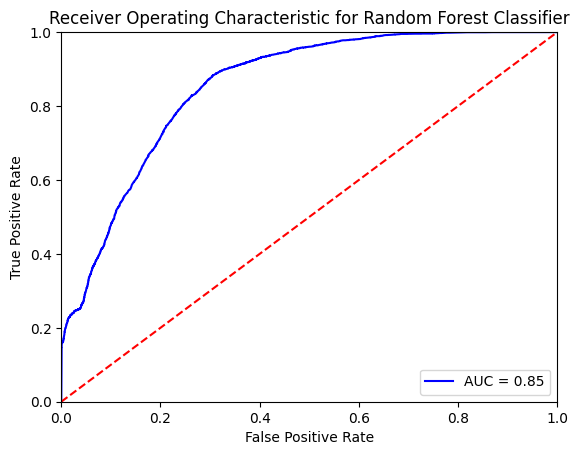

In [123]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = gnb.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC score is 0.85 for Gaussian Naive Bayes which is lowest among the 3 models without using SMOTE.

### Gaussian Naive Bayes using SMOTE

In [126]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

gnb = GaussianNB()
gnb.fit(oversampled_xtrain, oversampled_ytrain) #This is where the training is taking place
y_pred_gnb = gnb.predict(xtest) #Making predictions to test the model on test data
print('Gaussian Naive Bayes Train accuracy %s' % gnb.score(oversampled_xtrain, oversampled_ytrain)) #Train accuracy
print('Gaussian Naive Bayes Test accuracy %s' % accuracy_score(y_pred_gnb, ytest)) #Test accuracy
print(confusion_matrix(ytest, y_pred_gnb)) #Confusion matrix
print(classification_report(ytest, y_pred_gnb)) #Classification Report

Gaussian Naive Bayes Train accuracy 0.6751889168765743
Random Forest Test accuracy 0.7950807527041043
[[9250  944]
 [1822 1482]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     10194
           1       0.61      0.45      0.52      3304

    accuracy                           0.80     13498
   macro avg       0.72      0.68      0.69     13498
weighted avg       0.78      0.80      0.78     13498



The training accuracy dropped to 68% but the testing accuracy remained at 80% when using SMOTE.

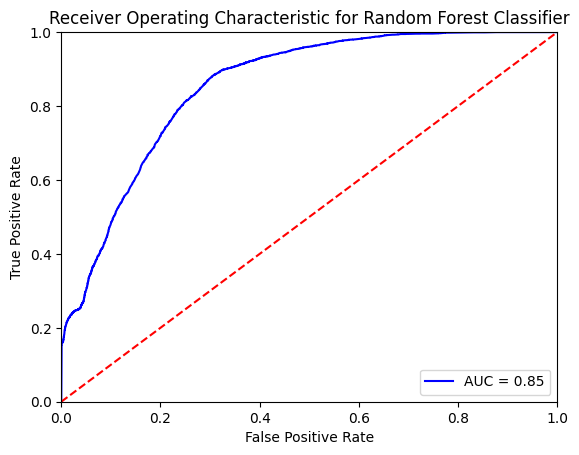

In [125]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = gnb.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SMOTE did not bring any improvement to the Gaussian Naive Bayes either.

# Results and Analysis
The adult dataset has a total of 48842 observations with 14 attributes. It has missing data, data type errors and whitespaces. After cleaning the data, rigorous statistical analyses are completed to identify the most significant features. This brings a total of 6 features in the feature (3 numerical and 3 categorical). Correlation matrix and VIF test are used to further investigate the feature set which revealed redundancy of 1 feature. This way we get the final feature set of 5 attributes.

After this, target encoding is done to encode the categorical variables. Standardizing is done for numerical variables as they are different in units with varying ranges. Target variable is also encoded in binary fashion. The full dataset is split into a 70-30 ratio for the train & test set. The same test set is used for evaluation.

As the dataset is imbalanced in nature, SMOTE is used to over-sample the minority class. SMOTE is applied each time after a model is evaluated to understand improvement. SMOTE is only applied to the training set; the test remains the same all the time. Instead of accuracy, Area Under Curve (AUC) score is evaluated here as AUC score represents the degree or measure of separability. A model with higher AUC is better at predicting True Positives and True Negatives. AUC score measures the total area underneath the ROC curve. AUC is scale invariant and also threshold invariant.

## Logistic Regression

### Without SMOTE
Logistic Regression Train accuracy 0.72
Logistic Regression Test accuracy 0.72

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     10194
           1       0.47      0.87      0.61      3304

### With SMOTE
Logistic Regression Train accuracy 0.77
Logistic Regression Test accuracy 0.72

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     10194
           1       0.47      0.87      0.61      3304

### AUC
The AUC score for logistic Regression is 0.84 in both cases - with or without SMOTE.

## Random Forest

### Without SMOTE
Random Forest Train accuracy 0.79
Random Forest Test accuracy 0.79

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     10194
           1       0.99      0.17      0.30      3304

### With SMOTE
Random Forest Train accuracy 0.78
Random Forest Test accuracy 0.74

              precision    recall  f1-score   support

           0       0.95      0.70      0.81     10194
           1       0.49      0.88      0.63      3304

### AUC
The AUC score for Random Forest is 0.87 for without SMOTE and is 0.86 for with SMOTE.

## Gaussian Naive Bayes

### Without SMOTE
Gaussian Naive Bayes Train accuracy 0.79
Gaussian Naive Bayes Test accuracy 0.79

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     10194
           1       0.66      0.34      0.44      3304

### With SMOTE
Gaussian Naive Bayes Train accuracy 0.67
Gaussian Naive Bayes Test accuracy 0.79

              precision    recall  f1-score   support

           0       0.84      0.91      0.87     10194
           1       0.61      0.45      0.52      3304

### AUC
The AUC score for logistic Regression is 0.85 in both cases - with or without SMOTE.

# Discussion and Conclusion

## Discussion
In terms of AUC score, Random Forest performed the nest among the 3 models with an AUC score of 0.87. Oversampling of the minority class to tackle the imbalance issue did not result in any improvement for any of the models. In summary, Random Forest without applying SMOTE performed the best. In terms of overall accuracy, both Random Forest and Gaussian Naive Bayes ranked top with a score of 80% (without applying SMOTE to any of them).

Moreover, a feature set of only 5 was an excellent discriminatory factor. It was mainly due to the rigorous statistical analyses in the EDA section along with correlation and multicollinearity tests. Furthermore, the target encoding and the standardization process improved data quality.

## Conclusion
Major learning points are:
- Data cleaning is crucial for machine learning pipeline.
- Exploratory Data Analysis is critical to identify the most significant factors.
- Statistical tests can easily identify the patterns and develop a solid feature set.
- Handling of imbalanced dataset is challenging.
- Accuracy may not be the best metric all the time.
- AUC score provides a better understanding for model performance when the dataset is imbalanced.

Future improvement points are:
- Complex algorithms (e.g. stacking) can be used to improve performance
- More data can be collected to improve training function